# TABULAR PLAYGROUND SERIES JAN 2022

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)

In [2]:
#FOLDER_PATH = 'tabular-playground-series-jan-2022'
FOLDER_PATH = 'tps-jan-2022'
TRAIN_FILE = 'train.csv'
TEST_FILE = 'test.csv'

TRAIN_PATH = os.path.join(FOLDER_PATH, TRAIN_FILE)
TEST_PATH = os.path.join(FOLDER_PATH, TEST_FILE)

In [3]:
train_df = pd.read_csv(TRAIN_PATH, parse_dates=['date'])
train_df.head()

row_id       date  country       store         product  num_sold
0       0 2015-01-01  Finland  KaggleMart      Kaggle Mug       329
1       1 2015-01-01  Finland  KaggleMart      Kaggle Hat       520
2       2 2015-01-01  Finland  KaggleMart  Kaggle Sticker       146
3       3 2015-01-01  Finland  KaggleRama      Kaggle Mug       572
4       4 2015-01-01  Finland  KaggleRama      Kaggle Hat       911

<AxesSubplot:>

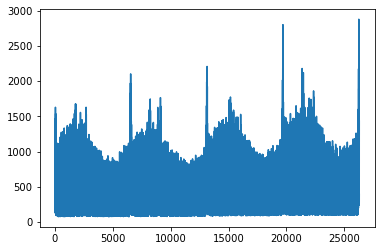

In [4]:
train_df = train_df.drop(columns=['row_id'])
train_df['num_sold'].plot()

## DECOMPOSITION OF TIME SERIES

In [5]:
train_pv = pd.pivot_table(train_df, index='date', 
                          values='num_sold', 
                          columns=['country', 'store', 'product'],
                          aggfunc=np.sum)
train_pv.head()

country       Finland                                                  \
store      KaggleMart                           KaggleRama              
product    Kaggle Hat Kaggle Mug Kaggle Sticker Kaggle Hat Kaggle Mug   
date                                                                    
2015-01-01        520        329            146        911        572   
2015-01-02        493        318            127        794        544   
2015-01-03        535        360            141        843        579   
2015-01-04        544        332            125        873        582   
2015-01-05        378        243            102        668        423   

country                       Norway                                       \
store                     KaggleMart                           KaggleRama   
product    Kaggle Sticker Kaggle Hat Kaggle Mug Kaggle Sticker Kaggle Hat   
date                                                                        
2015-01-01            283        906        526            250       1461   
2015-01-02            249        845        538            237       1446   
2015-01-03            265        930        614            254       1631   
2015-01-04            245        889        589            255       1540   
2015-01-05            187        671        435            184       1126   

country                                  Sweden                            \
store                                KaggleMart                             
product    Kaggle Mug Kaggle Sticker Kaggle Hat Kaggle Mug Kaggle Sticker   
date                                                                        
2015-01-01       1005            395        624        440            175   
2015-01-02        949            415        572        384            155   
2015-01-03       1029            451        630        420            173   
2015-01-04        957            455        697        406            169   
2015-01-05        739            310        442        298            127   

country                                          
store      KaggleRama                            
product    Kaggle Hat Kaggle Mug Kaggle Sticker  
date                                             
2015-01-01       1195        706            324  
2015-01-02        986        653            293  
2015-01-03       1167        734            319  
2015-01-04       1112        657            300  
2015-01-05        796        512            227

Text(0, 0.5, 'Finland - KaggleMart - Hat')

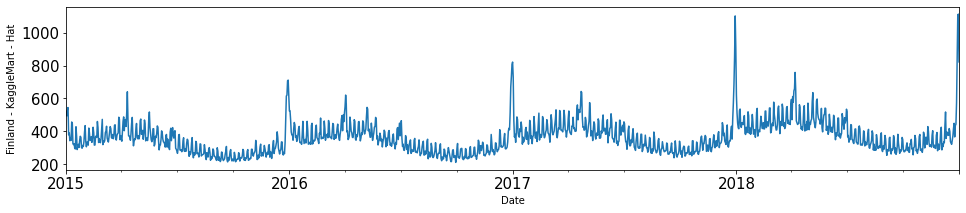

In [6]:
train_pv[('Finland', 'KaggleMart', 'Kaggle Hat')].plot(
    figsize=(16, 3), fontsize=15)
plt.xlabel('Date')
plt.ylabel('Finland - KaggleMart - Hat')

In [7]:
import statsmodels.api as sm
from matplotlib import rcParams

### SEASONALITY ANALYSIS

<AxesSubplot:xlabel='date'>

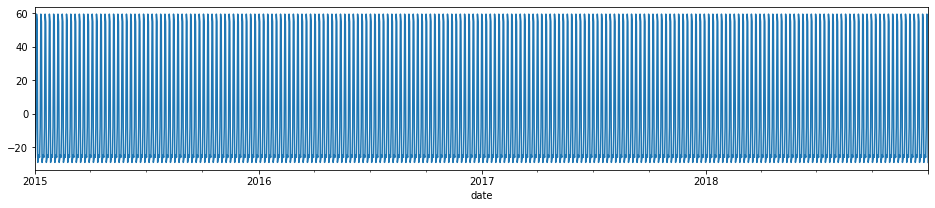

In [8]:
decomposition = sm.tsa.seasonal_decompose(
    train_pv[('Finland', 'KaggleMart', 'Kaggle Hat')])

rcParams['figure.figsize'] = 16, 3
decomposition.seasonal.plot()

<AxesSubplot:xlabel='date'>

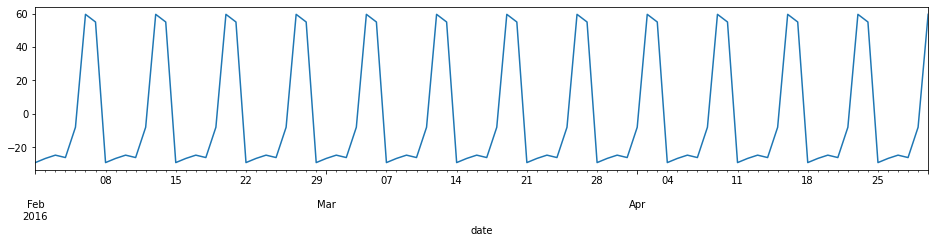

In [9]:
decomposition.seasonal['2016-02':'2016-04'].plot()

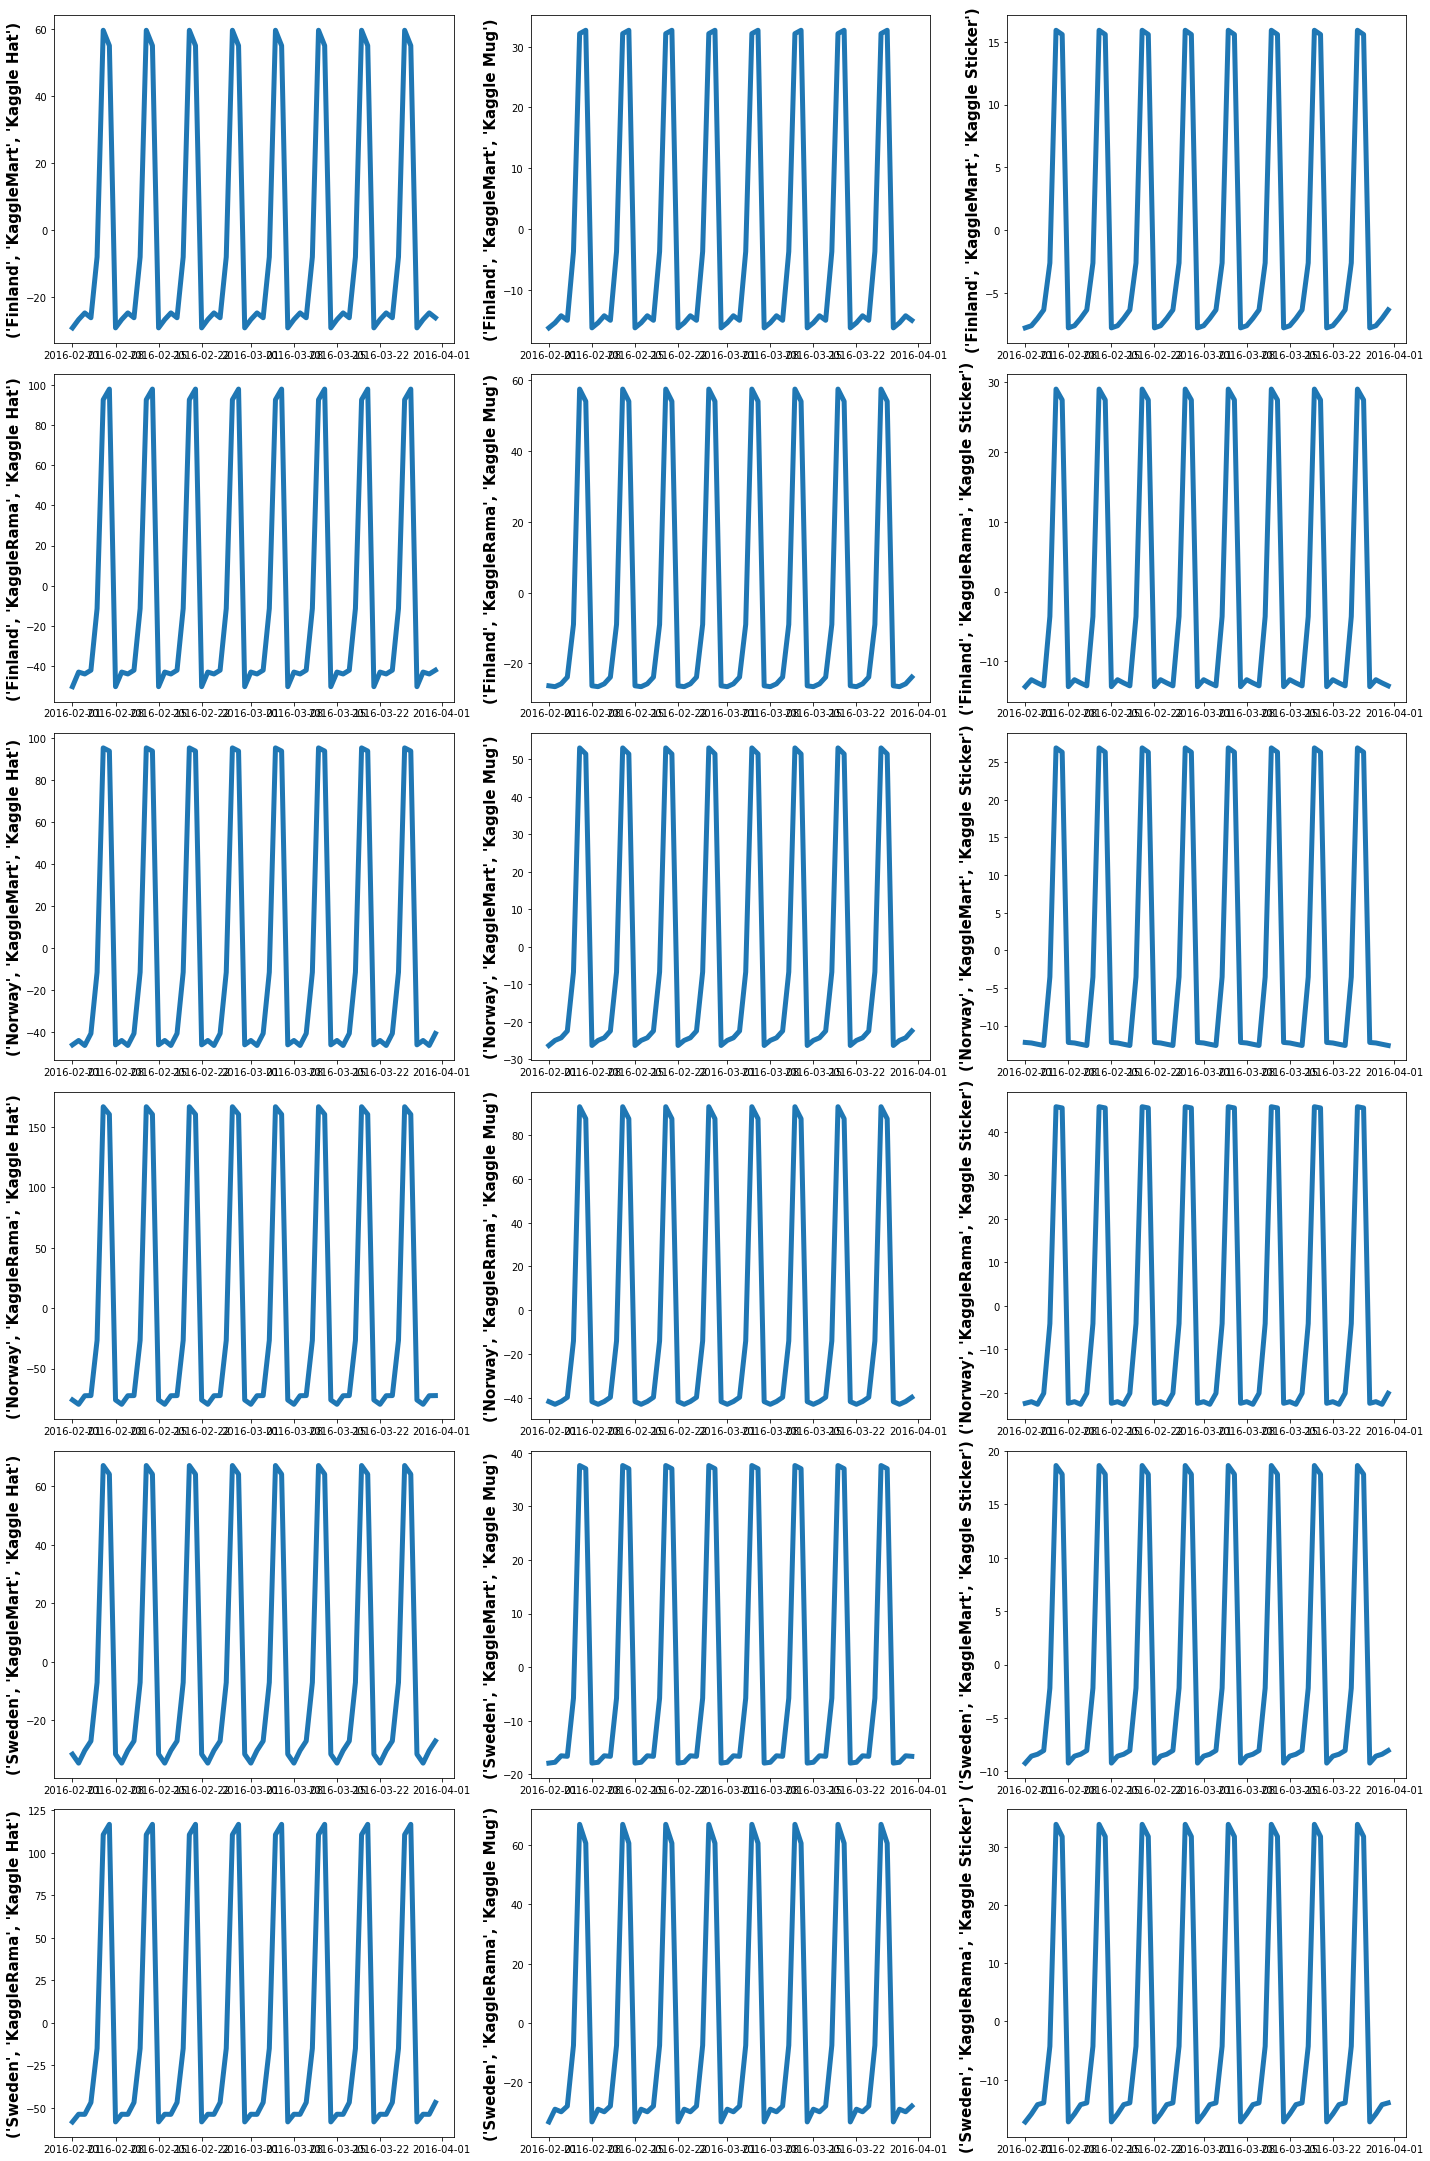

In [10]:
seasonality_dict = {}

for col in train_pv.columns:
    decomposition = sm.tsa.seasonal_decompose(train_pv[col])
    seasonality_dict[col] = decomposition.seasonal

train_seasonal = pd.DataFrame(seasonality_dict)

fig, axes = plt.subplots(6, 3, figsize=(20, 30))
axes = axes.flatten()

for i, col in enumerate(train_seasonal.columns):
    sns.lineplot(data=train_seasonal[col]['2016-02':'2016-03'], linewidth=5, ax=axes[i])
    
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col, fontsize=15, weight='bold')

plt.tight_layout()
plt.show()

### TREND ANALYSIS

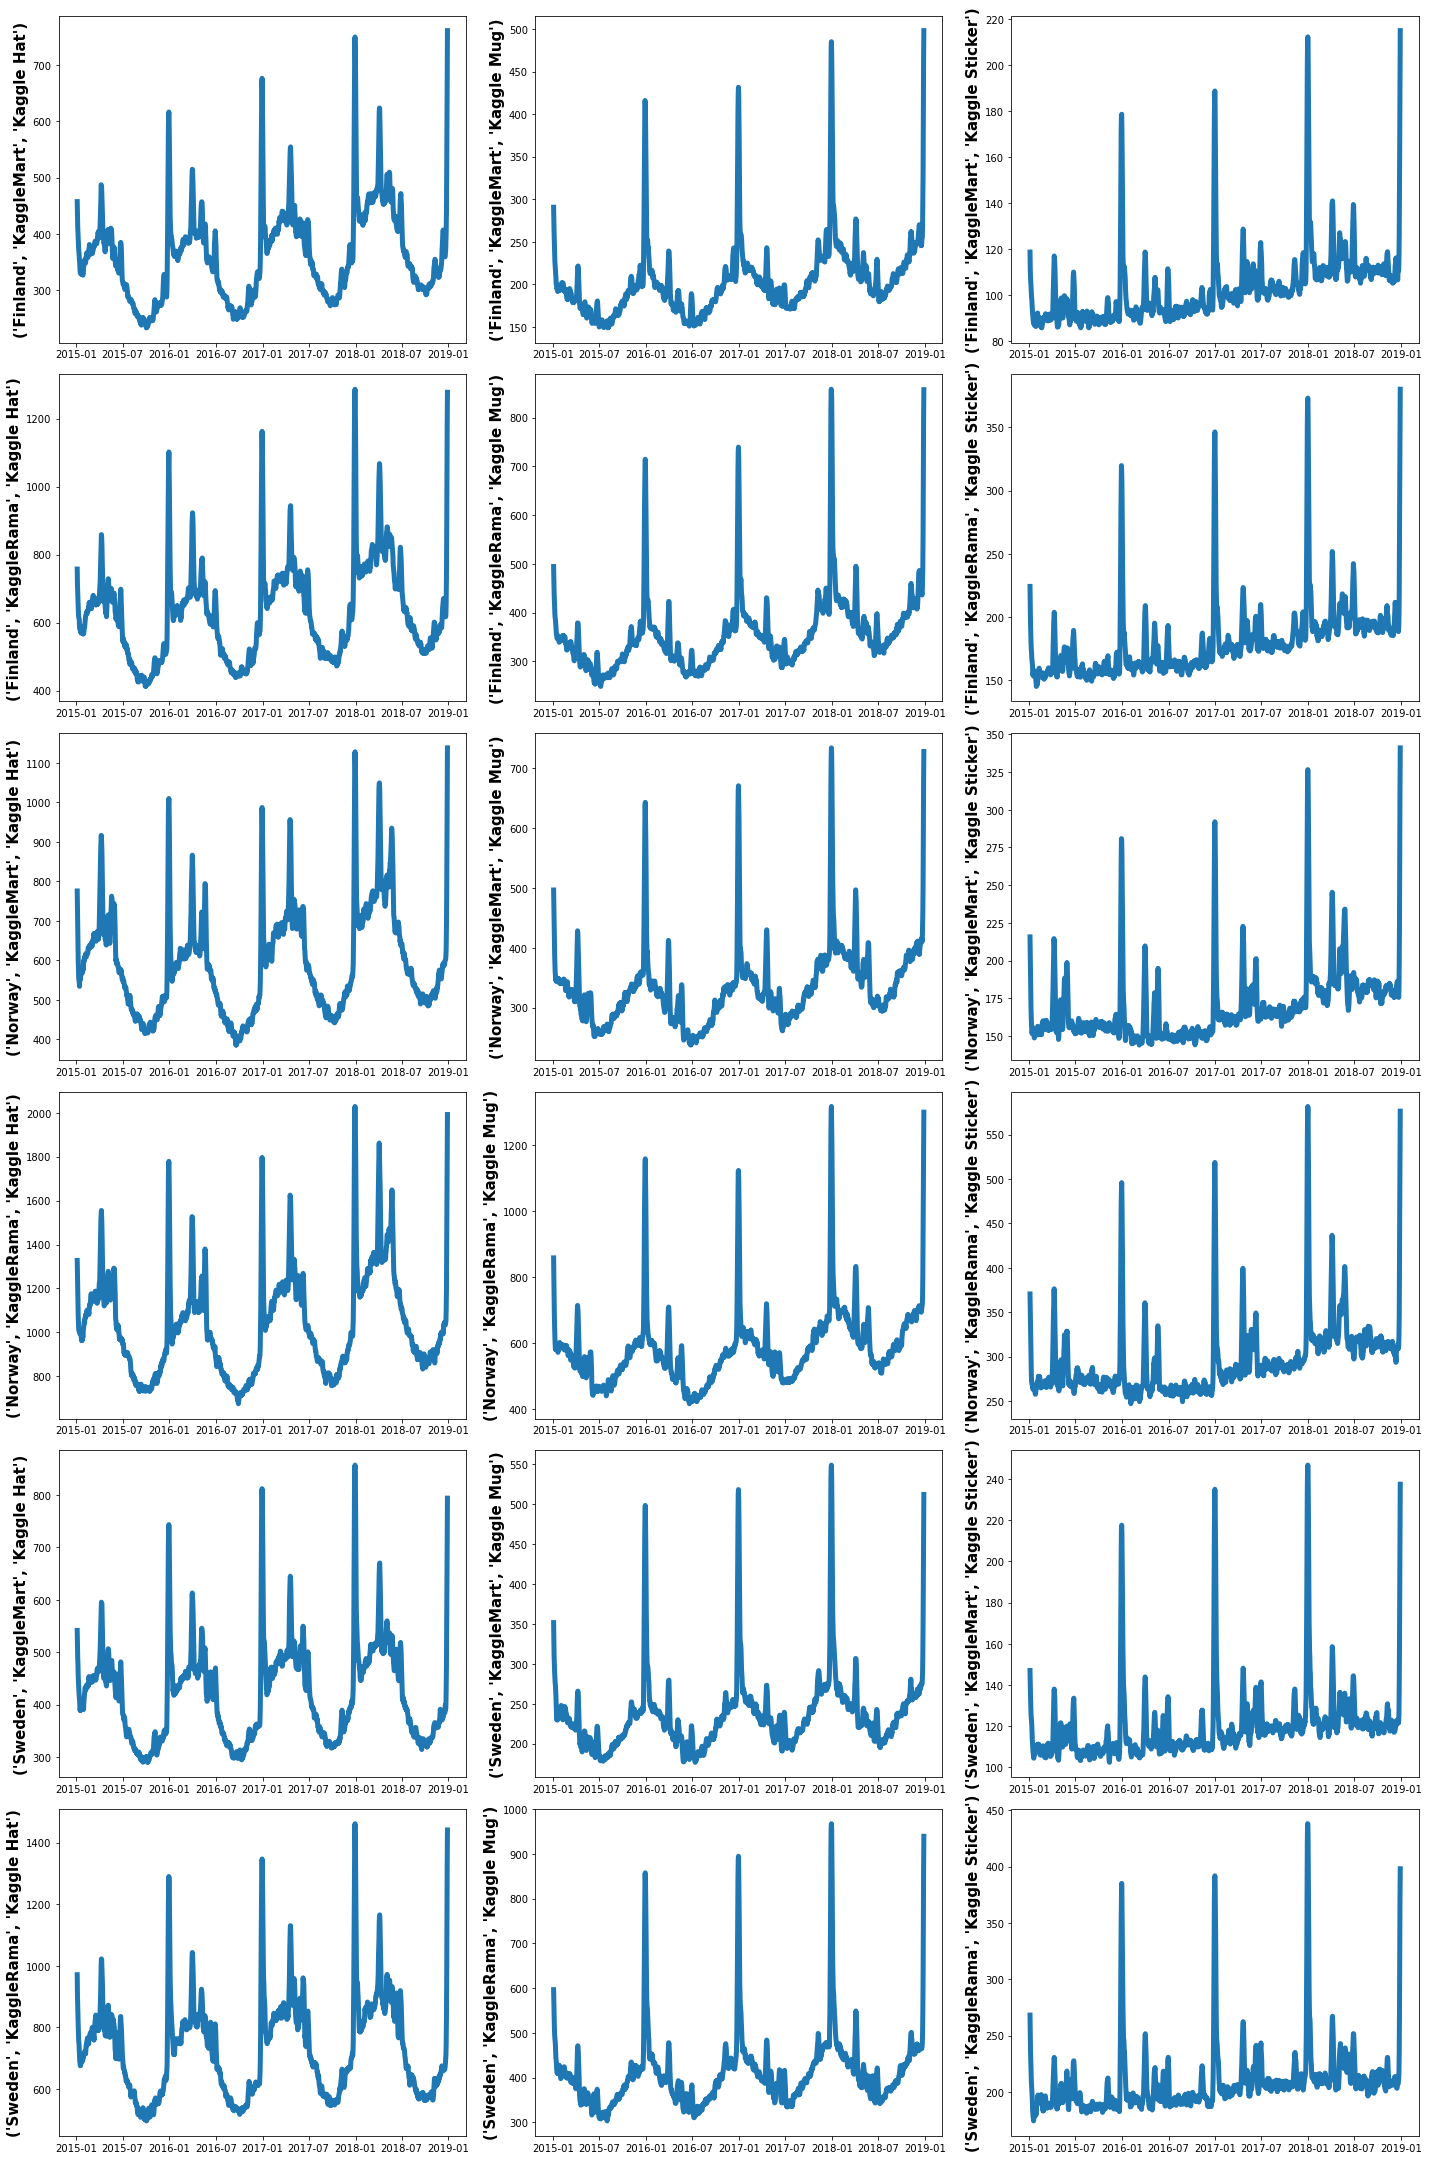

In [11]:
trend_dict = {}

for col in train_pv.columns:
    decomposition = sm.tsa.seasonal_decompose(train_pv[col])
    trend_dict[col] = decomposition.trend

train_trend = pd.DataFrame(trend_dict)

# plot
fig, axes = plt.subplots(6, 3, figsize=(20, 30))
axes = axes.flatten()

for i, col in enumerate(train_trend.columns):
    sns.lineplot(data=train_trend[col], linewidth=5, ax=axes[i])
    
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col, fontsize=15, weight='bold')
    
plt.tight_layout()
plt.show()

### NOISE

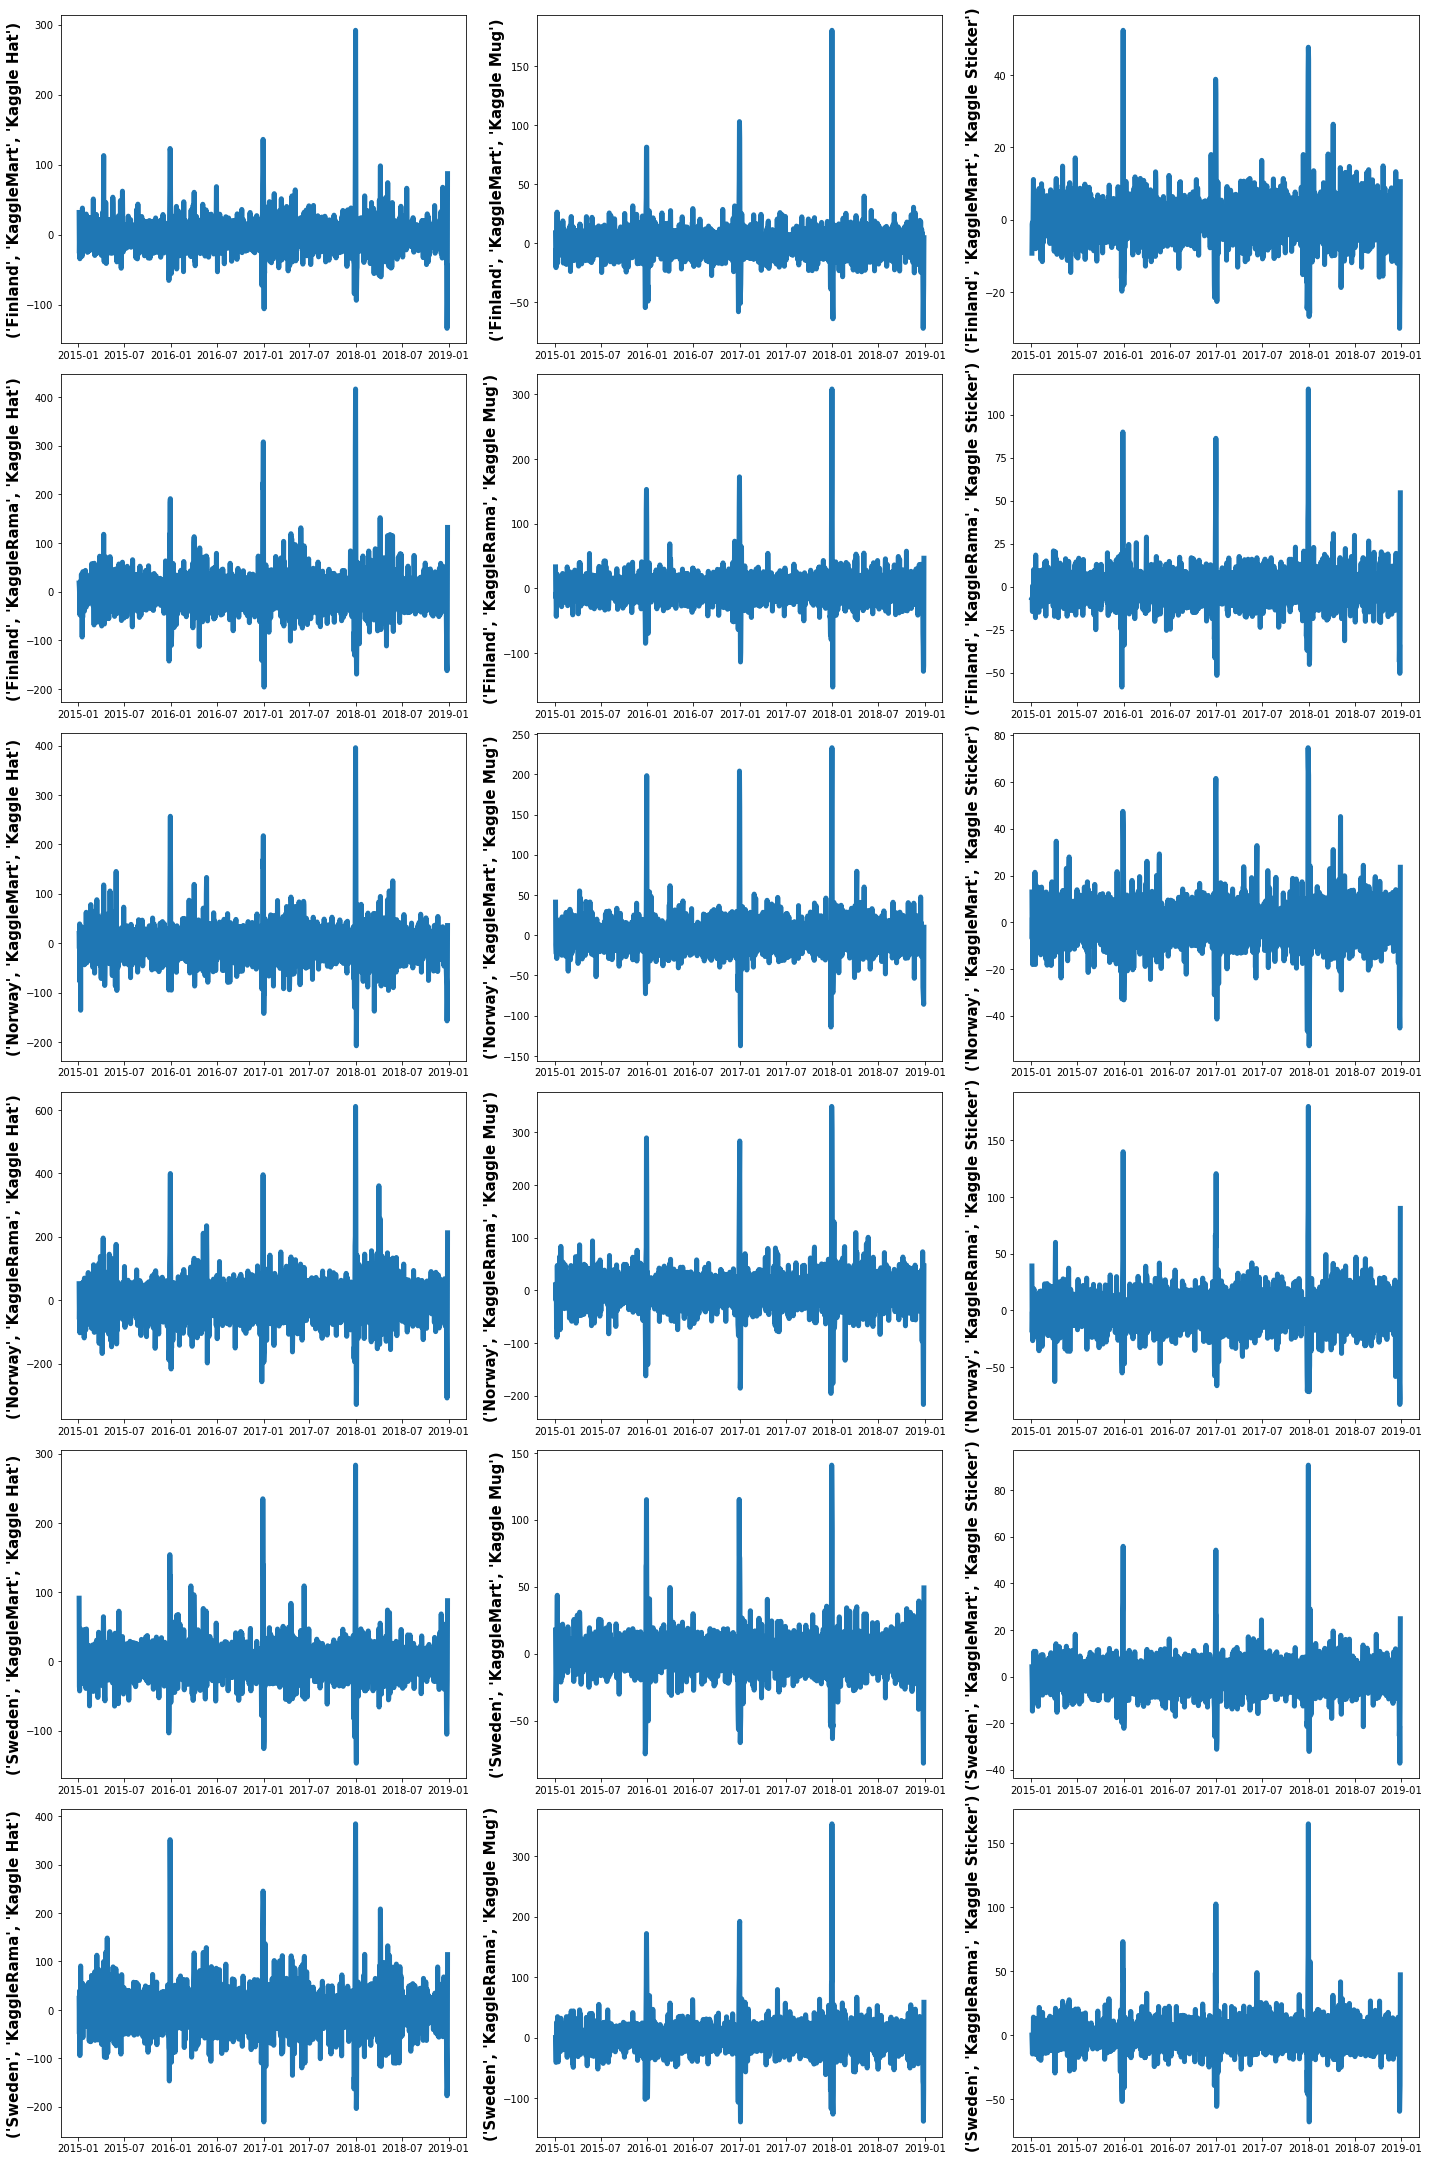

In [12]:
resid_dict = {}

for col in train_pv.columns:
    decomposition = sm.tsa.seasonal_decompose(train_pv[col])
    resid_dict[col] = decomposition.resid

train_resid = pd.DataFrame(resid_dict)

# plot
fig, axes = plt.subplots(6, 3, figsize=(20, 30))
axes = axes.flatten()

for i, col in enumerate(train_resid.columns):
    sns.lineplot(data=train_resid[col], linewidth=5, ax=axes[i])
    
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col, fontsize=15, weight='bold')
    
plt.tight_layout()
plt.show()

## WORKING WITH MULTIPLE TIME SERIES

In [13]:
# Normalizing time series by dividing every data point in the distribution
# by the first sample
train_pv.div(train_pv.iloc[0]).head()

country       Finland                                                  \
store      KaggleMart                           KaggleRama              
product    Kaggle Hat Kaggle Mug Kaggle Sticker Kaggle Hat Kaggle Mug   
date                                                                    
2015-01-01   1.000000   1.000000       1.000000   1.000000   1.000000   
2015-01-02   0.948077   0.966565       0.869863   0.871570   0.951049   
2015-01-03   1.028846   1.094225       0.965753   0.925357   1.012238   
2015-01-04   1.046154   1.009119       0.856164   0.958288   1.017483   
2015-01-05   0.726923   0.738602       0.698630   0.733260   0.739510   

country                       Norway                                       \
store                     KaggleMart                           KaggleRama   
product    Kaggle Sticker Kaggle Hat Kaggle Mug Kaggle Sticker Kaggle Hat   
date                                                                        
2015-01-01       1.000000   1.000000   1.000000          1.000   1.000000   
2015-01-02       0.879859   0.932671   1.022814          0.948   0.989733   
2015-01-03       0.936396   1.026490   1.167300          1.016   1.116359   
2015-01-04       0.865724   0.981236   1.119772          1.020   1.054073   
2015-01-05       0.660777   0.740618   0.826996          0.736   0.770705   

country                                  Sweden                            \
store                                KaggleMart                             
product    Kaggle Mug Kaggle Sticker Kaggle Hat Kaggle Mug Kaggle Sticker   
date                                                                        
2015-01-01   1.000000       1.000000   1.000000   1.000000       1.000000   
2015-01-02   0.944279       1.050633   0.916667   0.872727       0.885714   
2015-01-03   1.023881       1.141772   1.009615   0.954545       0.988571   
2015-01-04   0.952239       1.151899   1.116987   0.922727       0.965714   
2015-01-05   0.735323       0.784810   0.708333   0.677273       0.725714   

country                                          
store      KaggleRama                            
product    Kaggle Hat Kaggle Mug Kaggle Sticker  
date                                             
2015-01-01   1.000000   1.000000       1.000000  
2015-01-02   0.825105   0.924929       0.904321  
2015-01-03   0.976569   1.039660       0.984568  
2015-01-04   0.930544   0.930595       0.925926  
2015-01-05   0.666109   0.725212       0.700617

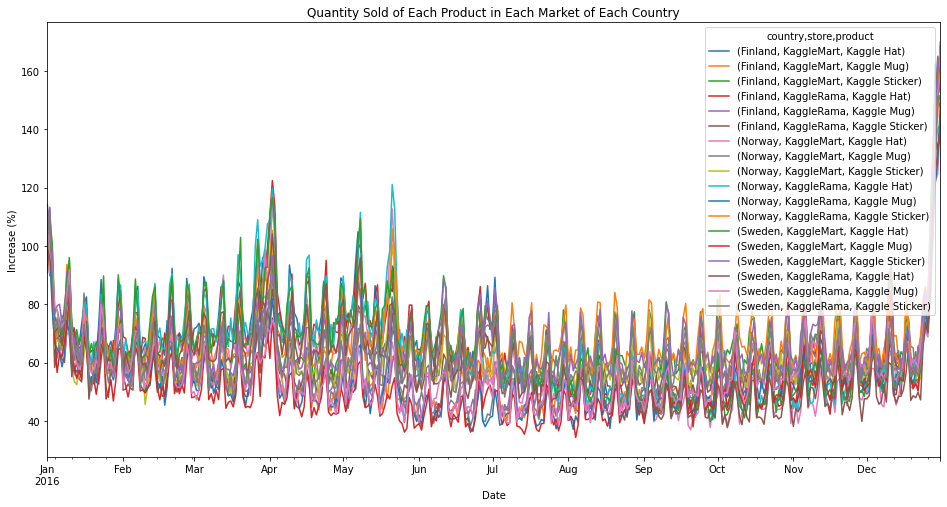

In [14]:
train_norm = train_pv.div(train_pv.iloc[0]).mul(100)

train_norm['2016':'2016'].plot(figsize=(16, 8), 
                title='Quantity Sold of Each Product in Each Market of Each Country')
plt.xlabel('Date')
plt.ylabel('Increase (%)')
plt.show()

**The quantity sold of a product is found highly correlated (>0.9) with the same product sold in different markets and countries** 

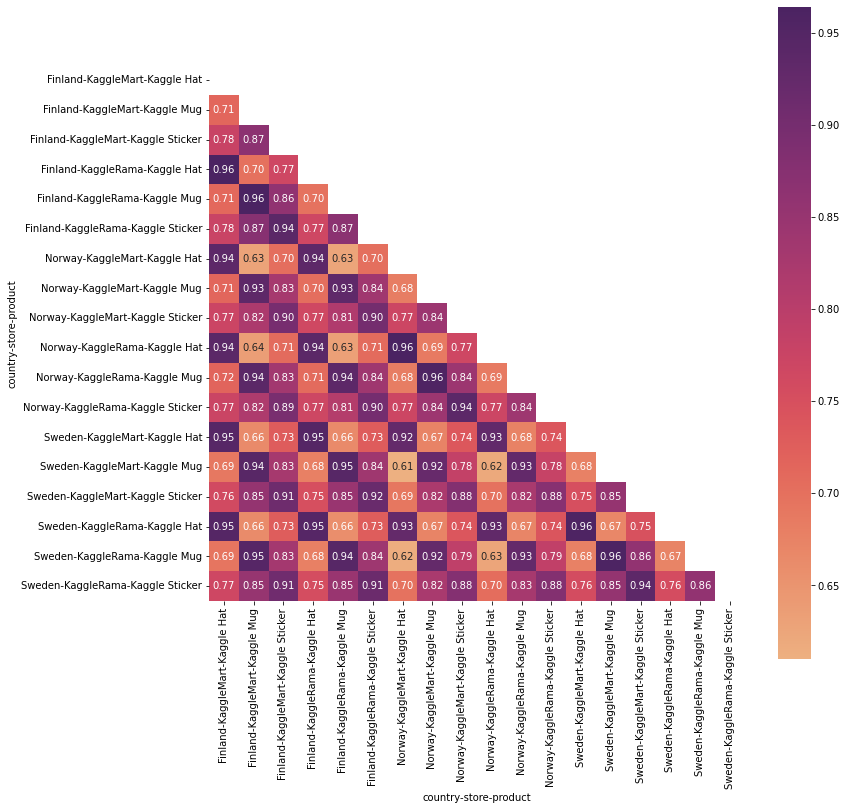

In [15]:
corr = train_pv.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype='bool'))

fig, ax = plt.subplots(1, 1, figsize=(12, 12))
sns.heatmap(corr, mask=mask, cmap='flare', square=True, annot=True,
            fmt='.2f', ax=ax)
plt.show()

**All the product seasonalities are perfectly correlated (it is obvious the data are faked)**

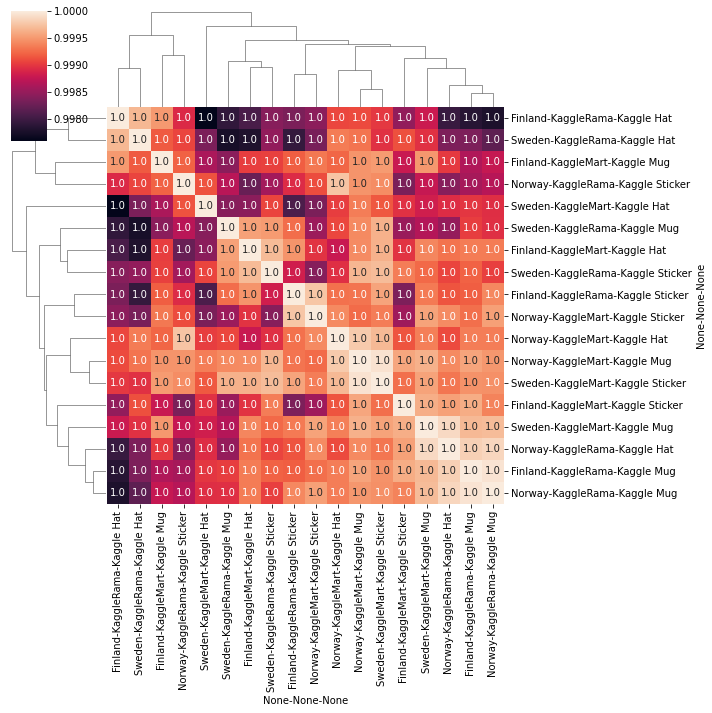

In [16]:
seasonality_dict = {
    col: sm.tsa.seasonal_decompose(train_pv[col]).seasonal 
    for col in train_pv.columns}

seasonality_corr = pd.DataFrame(seasonality_dict).corr()

sns.clustermap(seasonality_corr, annot=True, fmt='.1f')
plt.show()

**The correlation hierachy is product -> market -> country  
and hat > sticker > mug**

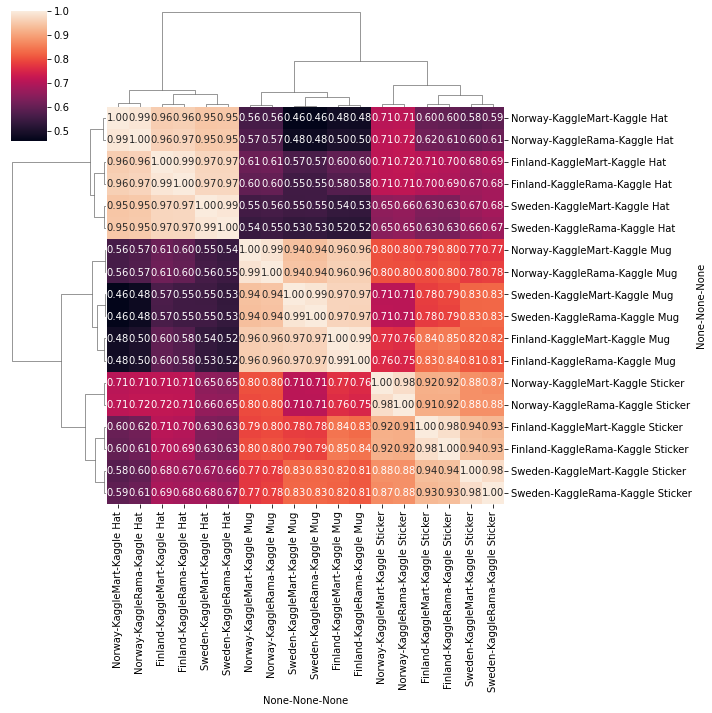

In [21]:
trend_dict = {
    col: sm.tsa.seasonal_decompose(train_pv[col]).trend
    for col in train_pv.columns
}

trend_corr = pd.DataFrame(trend_dict).corr()

sns.clustermap(data=trend_corr, annot=True, fmt='.2f')
plt.show()

## AUTOCORRELATION AND PARTIAL AUTOCORRELATION

In [22]:
from statsmodels.graphics import tsaplots

**The correlation shows a cycle of 7 days indicating the length of the seasonality to be a week**

**Trend and seasonality exist**

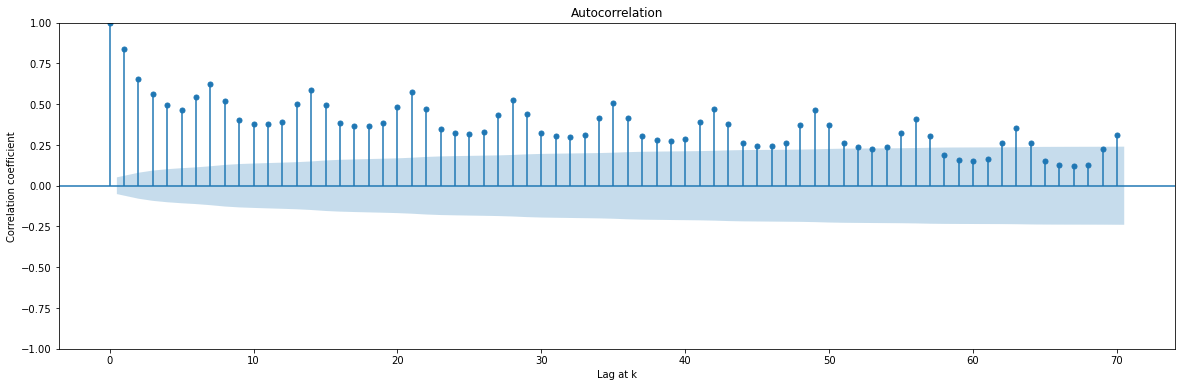

In [23]:
rcParams['figure.figsize'] = 20, 6

fig = tsaplots.plot_acf(train_pv[('Finland', 'KaggleMart', 'Kaggle Hat')], lags=70)

plt.xlabel('Lag at k')
plt.ylabel('Correlation coefficient')
plt.show()

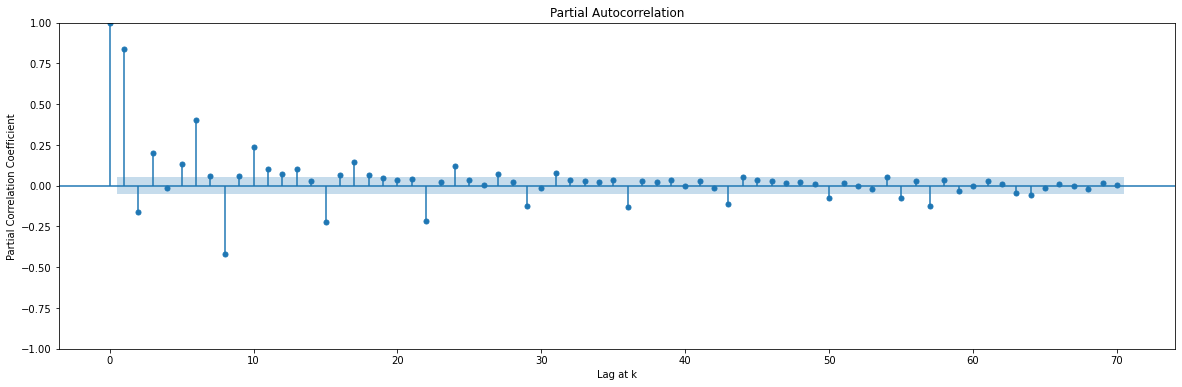

In [24]:
rcParams['figure.figsize'] = 20, 6

fig = tsaplots.plot_pacf(train_pv[('Finland', 'KaggleMart', 'Kaggle Hat')], lags=70, 
                        method='ywm')

plt.xlabel('Lag at k')
plt.ylabel('Partial Correlation Coefficient')
plt.show()

## WHITE NOISE

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

### FIT WITH TIME STAMP ONLY

In [26]:
X = train_pv.reset_index()['date'].values.reshape(-1, 1)
y = train_pv[('Finland', 'KaggleMart', 'Kaggle Hat')].values

Text(0.5, 1.0, 'Plot of the Error Residuals')

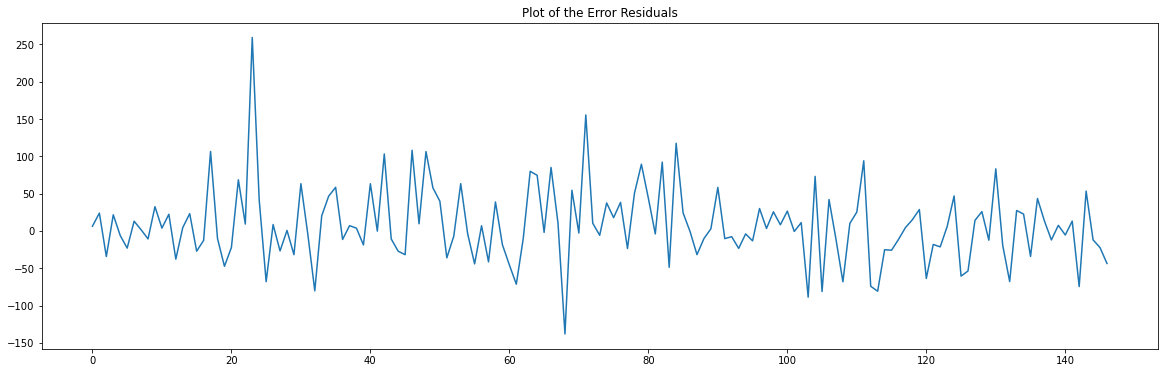

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.1)

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

y_preds = rfr.predict(X_test)
y_resid = y_test.flatten() - y_preds

plt.plot(y_resid)
plt.title('Plot of the Error Residuals')

**The residual mean is 7.2 > 0  
and is right skewed (skew = 0.95)**

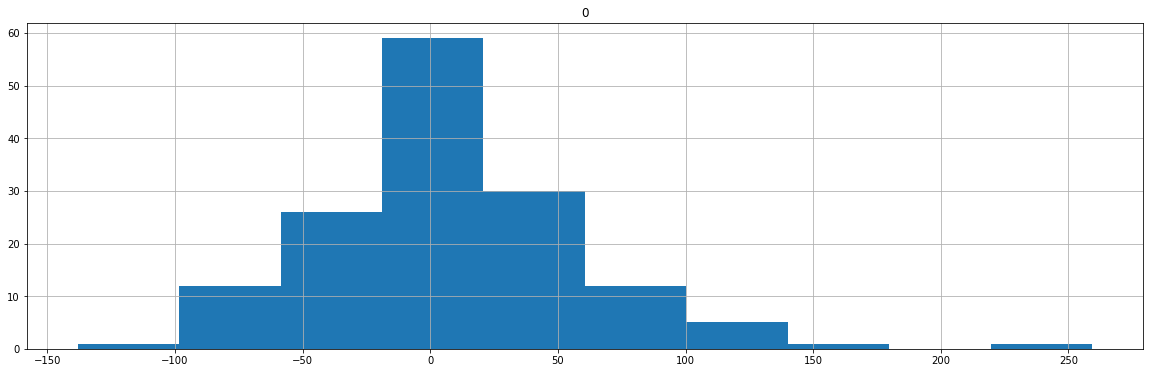

In [28]:
pd.DataFrame(y_resid).hist(bins=10)
plt.show()

In [29]:
pd.DataFrame(y_resid).skew()

0    0.946458
dtype: float64

In [30]:
y_resid.mean()

7.476190476190476

### FIT WITH HAT SOLD IN KAGGLERAMA FINLAND (HIGHLY CORRELATED)

In [31]:
X = train_pv[('Finland', 'KaggleRama', 'Kaggle Hat')].values.reshape(-1, 1)
y = train_pv[('Finland', 'KaggleMart', 'Kaggle Hat')].values

Text(0.5, 1.0, 'Plot of the Error Residuals')

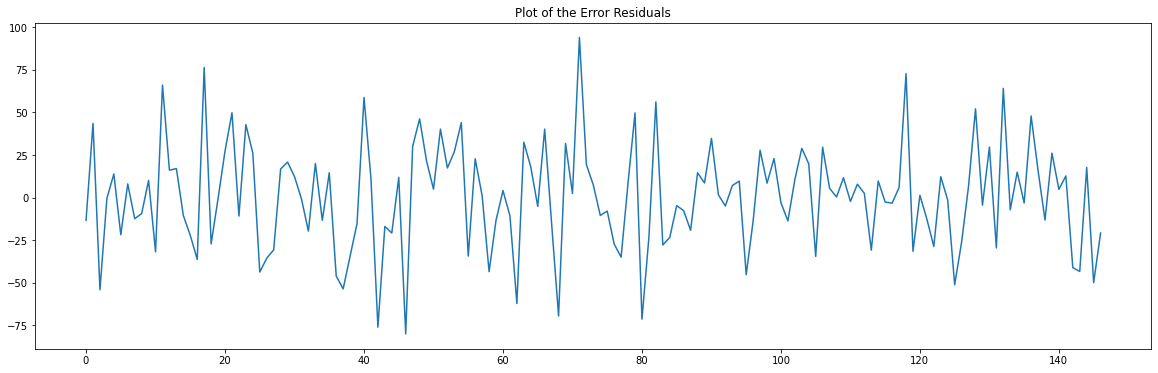

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.1)

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

y_preds = rfr.predict(X_test) + 2 # the mean diff is 2 in residuals
y_resid = y_test.flatten() - y_preds

plt.plot(y_resid)
plt.title('Plot of the Error Residuals')

**The residual mean is 2 > 0  
and is almost neutral (skew = 0.06)**

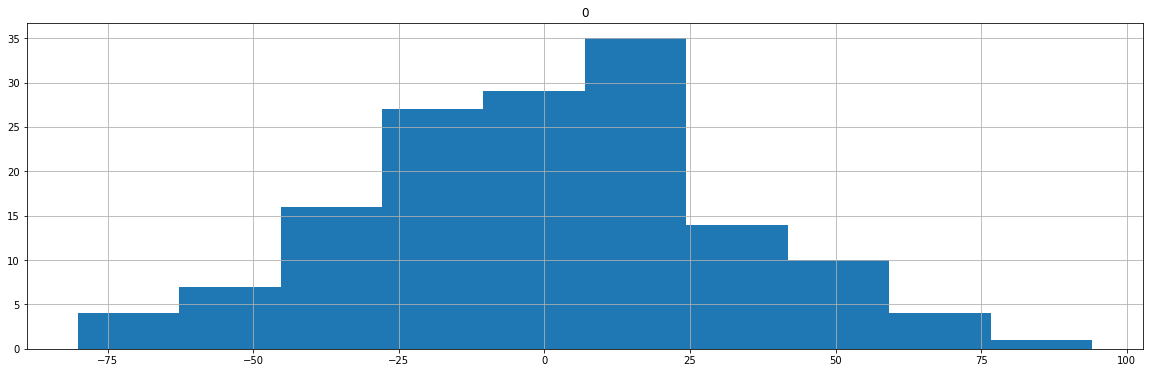

In [33]:
pd.DataFrame(y_resid).hist(bins=10)
plt.show()

In [34]:
pd.DataFrame(y_resid).skew()

0    0.05049
dtype: float64

In [35]:
y_resid.mean()

0.4134410727216894

In [36]:
from sklearn.linear_model import LinearRegression

Text(0.5, 1.0, 'Plot of the Error Residuals')

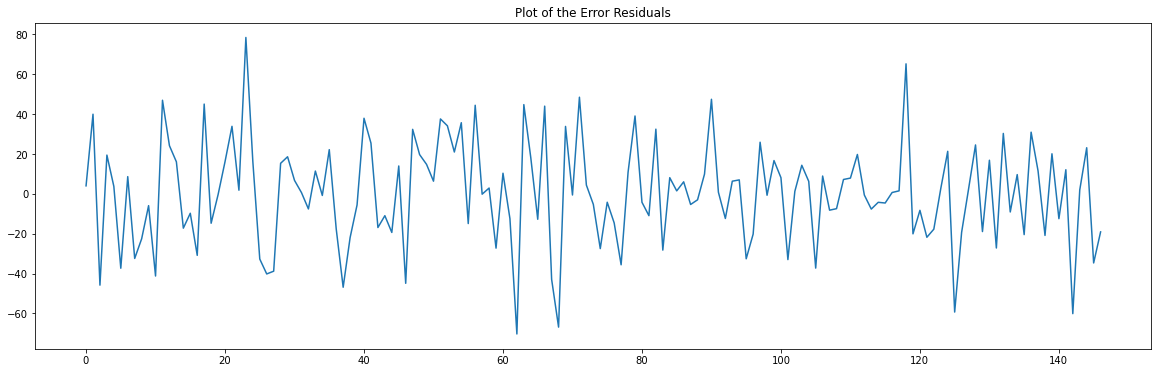

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, test_size=0.1)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_preds = lr.predict(X_test) 
y_resid = y_test.flatten() - y_preds - 3 # the mean diff in residual is 3

plt.plot(y_resid)
plt.title('Plot of the Error Residuals')

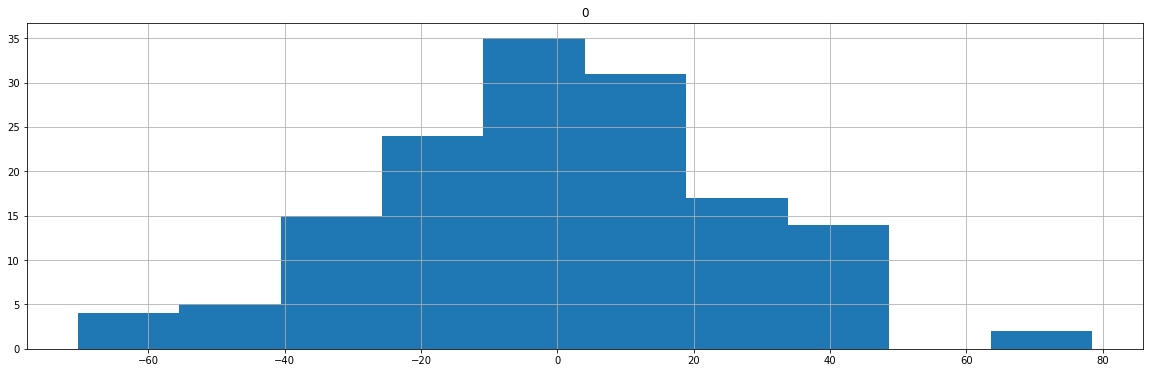

In [38]:
pd.DataFrame(y_resid).hist(bins=10)
plt.show()

In [39]:
y_resid.mean()

0.19929665159842982

In [40]:
pd.DataFrame(y_resid).skew()

0   -0.049679
dtype: float64

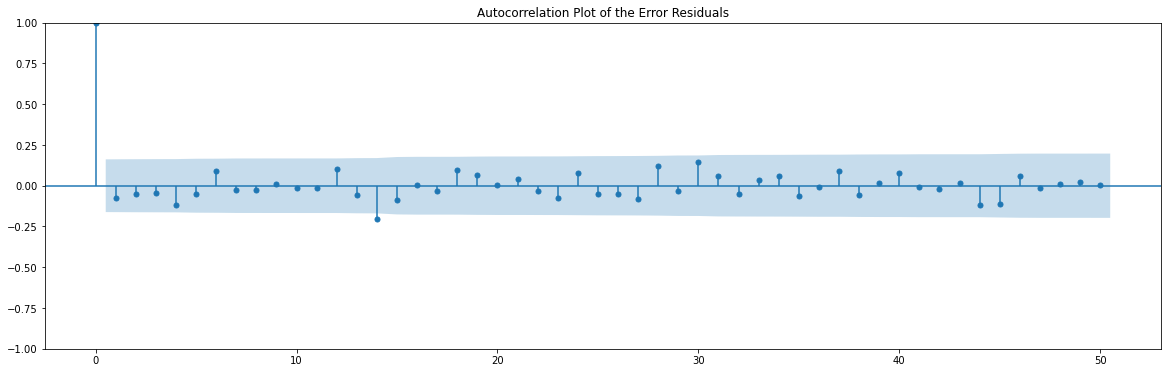

In [41]:
fig = tsaplots.plot_acf(y_resid, lags=50)

plt.title('Autocorrelation Plot of the Error Residuals')
plt.show()

## RANDOM WALKS

<AxesSubplot:xlabel='date'>

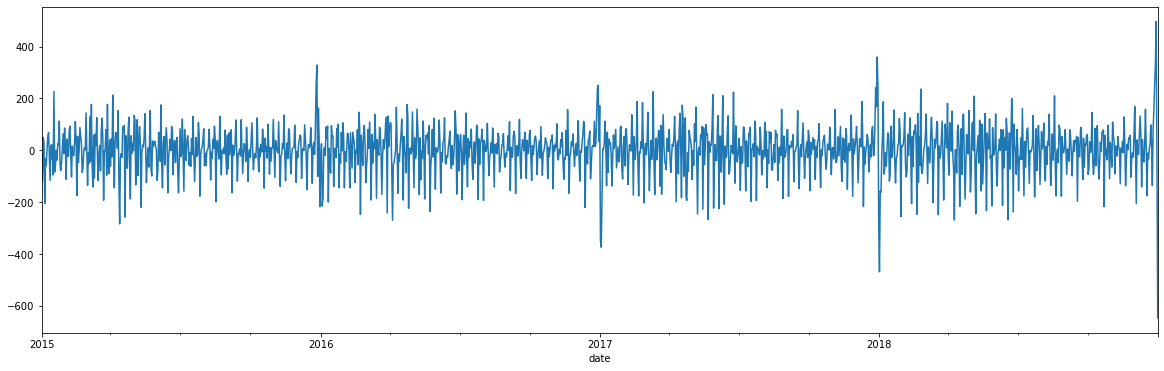

In [42]:
train_pv['diff'] = train_pv[('Finland', 'KaggleRama', 'Kaggle Hat')].diff()

train_pv['diff'].plot()

In [43]:
train_pv['diff'].mean()

0.2191780821917808

In [44]:
train_pv['diff'].skew()

-0.5775404229360858

<AxesSubplot:>

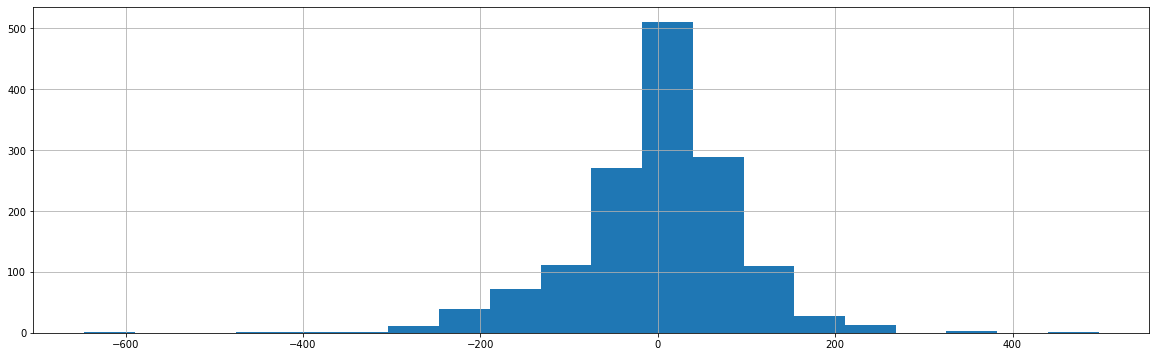

In [45]:
train_pv['diff'].hist(bins=20)

In [46]:
from statsmodels.tsa.stattools import adfuller

The p-value is significant small and we can reject the null hypothesis that train_pv['diff'] is a random walk.

train_pv['diff'] is white noise means the original dataset is a random walk.

In [48]:
results = adfuller(train_pv['diff'].dropna())

print(f'ADF Statistics: {results[0]}')
print(f'p-value: {results[1]}')
print('Critical Values:')
for key, value in results[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistics: -10.826529844544332
p-value: 1.7511680777648147e-19
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


We cannot reject the null hypothesis that hat sold in Rama of Finland is a random walk

In [49]:
results = adfuller(train_pv[('Finland', 'KaggleRama', 'Kaggle Hat')].dropna())

print(f'ADF Statistics: {results[0]}')
print(f'p-value: {results[1]}')
print('Critical Values:')
for key, value in results[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistics: -2.4787919665552742
p-value: 0.12072010680134782
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


## NON-STATIONARITY

Adfuller test:  
* **The null hypothesis**: the distribution is non-stationary, time-dependent (it has a unit root)

In [50]:
results = adfuller(train_pv[('Norway', 'KaggleRama', 'Kaggle Mug')])

print(f'ADF Statistics: {results[0]}')
print(f'p-value: {results[1]}')
print('Critical Values:')
for key, value in results[4].items():
    print(f'\t{key}: {value}')

ADF Statistics: -2.1638685080884885
p-value: 0.21961937999529452
Critical Values:
	1%: -3.434911997169608
	5%: -2.863554810504947
	10%: -2.567842671398422


### TRAONSFORMING NON-STATIONARY SERIES TO MAKE IT STAIONARY

In [51]:
train_pv['diff_2'] = train_pv[('Finland', 'KaggleRama', 'Kaggle Hat')].diff(periods=2)
train_pv['diff_3'] = train_pv[('Finland', 'KaggleRama', 'Kaggle Hat')].diff(periods=3)

train_pv.head()

country       Finland                                                  \
store      KaggleMart                           KaggleRama              
product    Kaggle Hat Kaggle Mug Kaggle Sticker Kaggle Hat Kaggle Mug   
date                                                                    
2015-01-01        520        329            146        911        572   
2015-01-02        493        318            127        794        544   
2015-01-03        535        360            141        843        579   
2015-01-04        544        332            125        873        582   
2015-01-05        378        243            102        668        423   

country                       Norway                                       \
store                     KaggleMart                           KaggleRama   
product    Kaggle Sticker Kaggle Hat Kaggle Mug Kaggle Sticker Kaggle Hat   
date                                                                        
2015-01-01            283        906        526            250       1461   
2015-01-02            249        845        538            237       1446   
2015-01-03            265        930        614            254       1631   
2015-01-04            245        889        589            255       1540   
2015-01-05            187        671        435            184       1126   

country                                  Sweden                            \
store                                KaggleMart                             
product    Kaggle Mug Kaggle Sticker Kaggle Hat Kaggle Mug Kaggle Sticker   
date                                                                        
2015-01-01       1005            395        624        440            175   
2015-01-02        949            415        572        384            155   
2015-01-03       1029            451        630        420            173   
2015-01-04        957            455        697        406            169   
2015-01-05        739            310        442        298            127   

country                                           diff diff_2 diff_3  
store      KaggleRama                                                 
product    Kaggle Hat Kaggle Mug Kaggle Sticker                       
date                                                                  
2015-01-01       1195        706            324    NaN    NaN    NaN  
2015-01-02        986        653            293 -117.0    NaN    NaN  
2015-01-03       1167        734            319   49.0  -68.0    NaN  
2015-01-04       1112        657            300   30.0   79.0  -38.0  
2015-01-05        796        512            227 -205.0 -175.0 -126.0

In [52]:
results = adfuller(train_pv['diff_2'].dropna())

results[1]

5.437145407266875e-19

<AxesSubplot:xlabel='date'>

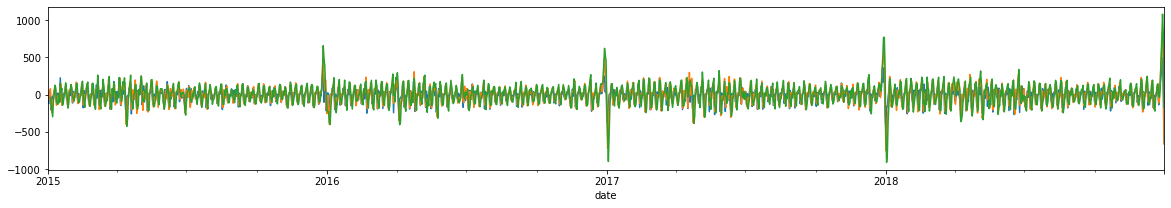

In [53]:
train_pv['diff'].plot(figsize=(20, 3))
train_pv['diff_2'].plot(figsize=(20, 3))
train_pv['diff_3'].plot(figsize=(20, 3))

## FEATURE ENGINEERING

<AxesSubplot:xlabel='date'>

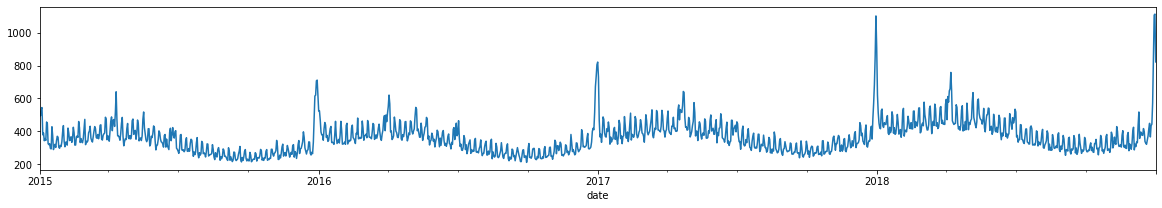

In [54]:
train_pv[('Finland', 'KaggleMart', 'Kaggle Hat')].plot(figsize=(20, 3))

In [55]:
train_pv['Day of the Month'] = train_pv.index.day
train_pv['Day of the Week'] = train_pv.index.weekday
train_pv['Day of the Year'] = train_pv.index.dayofyear
train_pv['Week of the Year'] = train_pv.index.isocalendar().week
train_pv['Year'] = train_pv.index.year
train_pv['Month'] = train_pv.index.month
train_pv['Quater'] = train_pv.index.quarter

train_pv['Weekend'] = (train_pv['Day of the Week'] >= 5).astype(int)

train_pv.sort_values(by=('Finland', 'KaggleMart', 'Kaggle Hat'), ascending=False).head(10)

country       Finland                                                  \
store      KaggleMart                           KaggleRama              
product    Kaggle Hat Kaggle Mug Kaggle Sticker Kaggle Hat Kaggle Mug   
date                                                                    
2018-12-30       1113        757            326       1878       1241   
2018-12-29       1107        774            296       1895       1398   
2017-12-30       1102        698            276       1795       1223   
2017-12-31        908        580            269       1512        978   
2017-12-29        855        552            248       1552       1028   
2018-12-28        841        499            223       1398        895   
2018-12-31        822        469            238       1231        831   
2016-12-31        821        542            215       1534        874   
2016-12-30        805        531            221       1362        903   
2018-04-07        758        321            181       1183        595   

country                       Norway                                       \
store                     KaggleMart                           KaggleRama   
product    Kaggle Sticker Kaggle Hat Kaggle Mug Kaggle Sticker Kaggle Hat   
date                                                                        
2018-12-30            554       1809       1052            500       2851   
2018-12-29            559       1650       1113            518       2884   
2017-12-30            517       1619       1020            420       2807   
2017-12-31            436       1438        828            409       2514   
2017-12-29            415       1277        871            393       2184   
2018-12-28            431       1162        731            361       2178   
2018-12-31            360       1124        728            351       2128   
2016-12-31            428       1284        857            354       2212   
2016-12-30            429       1128        868            350       2166   
2018-04-07            280       1180        593            292       2124   

country                                  Sweden                            \
store                                KaggleMart                             
product    Kaggle Mug Kaggle Sticker Kaggle Hat Kaggle Mug Kaggle Sticker   
date                                                                        
2018-12-30       1935            833       1133        730            336   
2018-12-29       1816            874       1106        720            348   
2017-12-30       1715            807       1207        704            356   
2017-12-31       1544            700       1037        662            290   
2017-12-29       1638            655       1038        680            283   
2018-12-28       1333            662        874        555            260   
2018-12-31       1383            561        823        570            250   
2016-12-31       1476            671       1001        614            276   
2016-12-30       1298            570        930        585            287   
2018-04-07        947            495        773        371            192   

country                                           diff diff_2  diff_3  \
store      KaggleRama                                                   
product    Kaggle Hat Kaggle Mug Kaggle Sticker                         
date                                                                    
2018-12-30       2138       1303            587  -17.0  480.0   810.0   
2018-12-29       2169       1438            596  497.0  827.0  1082.0   
2017-12-30       1956       1388            637  243.0  603.0   771.0   
2017-12-31       1781       1188            530 -283.0  -40.0   320.0   
2017-12-29       1660       1047            497  360.0  528.0   770.0   
2018-12-28       1540        990            441  330.0  585.0   740.0   
2018-12-31       1441       1004            388 -647.0 -664.0  -167.0   
2016-12-31      

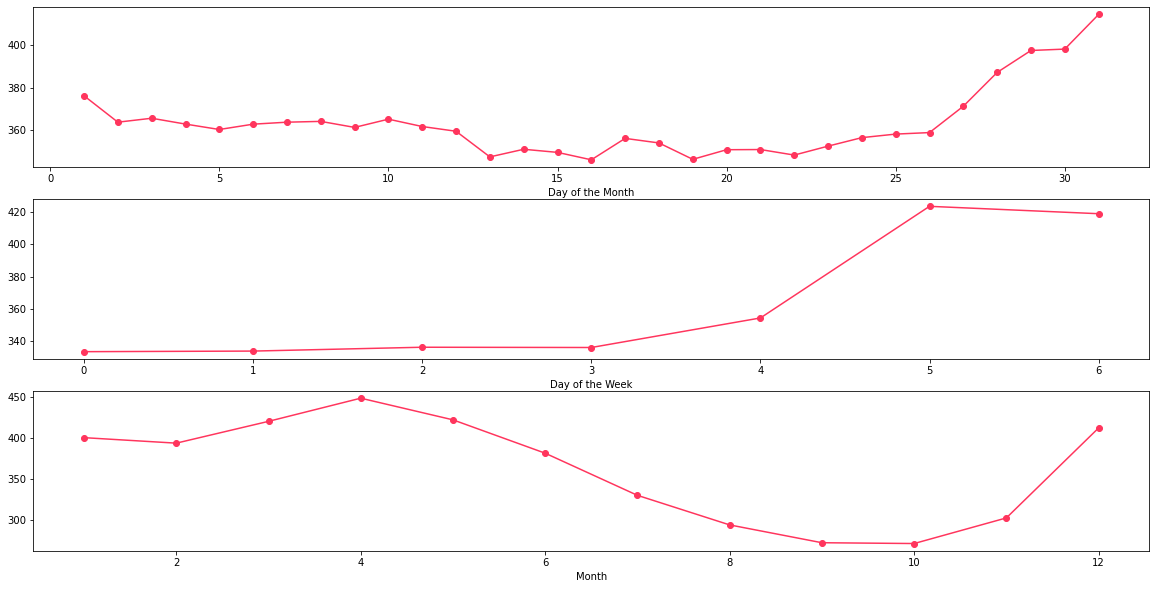

In [56]:
feature_names = ['Day of the Month', 'Day of the Week', 'Month']

fig, axes = plt.subplots(3, 1, figsize=(20, 10))
axes = axes.flatten()

for i, feature in enumerate(feature_names):
    grouped = train_pv.groupby(feature).mean()[('Finland', 'KaggleMart', 'Kaggle Hat')]
    grouped.plot(ax=axes[i], color='#ff355d', marker='o')

### VALIDATE NEW FEATURES

In [57]:
from sklearn.model_selection import TimeSeriesSplit, cross_validate

In [58]:
ts_cv = TimeSeriesSplit(n_splits=5)

X = train_pv[['Day of the Month', 'Day of the Week', 
                            'Month', 'Year', 'Day of the Year', 'Week of the Year', 
                            'Quater', 'Weekend']]
y = train_pv[('Finland', 'KaggleMart', 'Kaggle Hat')]

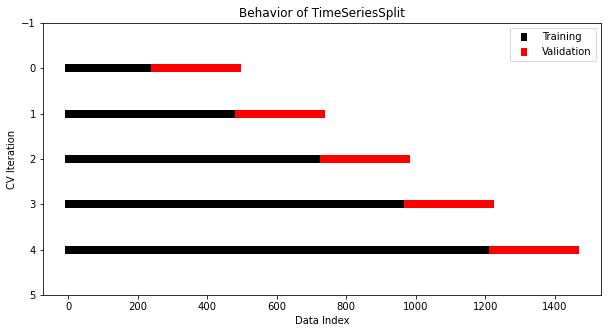

In [59]:
fig, ax = plt.subplots(figsize=(10, 5))
for i, (tr, tt) in enumerate(ts_cv.split(X, y)):
    p1 = ax.scatter(tr, [i]*len(tr), c='black', marker='_', lw=8)
    p2 = ax.scatter(tt, [i]*len(tt), c='red', marker='_', lw=8)
    
    ax.set(
        title='Behavior of TimeSeriesSplit', 
        xlabel='Data Index', 
        ylabel='CV Iteration', 
        ylim=[5, -1], 
    )
    ax.legend([p1, p2], ['Training', 'Validation'])

plt.show()

In [60]:
rfr = RandomForestRegressor(n_estimators=1_000, random_state=42)

ts_cv = TimeSeriesSplit(n_splits=5)

X = train_pv.reset_index()['date'].values.reshape(-1, 1)
y = train_pv[('Finland', 'KaggleMart', 'Kaggle Hat')].values

scores = cross_validate(rfr, X, y, cv=ts_cv, 
                        scoring='neg_mean_squared_log_error', 
                        return_estimator=True)

base_rmsle = np.sqrt(-np.mean(scores['test_score']))
print(f'Base Root Mean Squared Log Error is: {base_rmsle:.5f}.')

Base Root Mean Squared Log Error is: 0.45076.


In [61]:
rfr_new = RandomForestRegressor(n_estimators=1_000, random_state=42)

ts_cv = TimeSeriesSplit(n_splits=5)

X_new = train_pv[['Day of the Month', 'Day of the Week', 
                            'Month', 'Year', 'Day of the Year', 'Week of the Year', 
                            'Quater', 'Weekend']].values
y_new = train_pv[('Finland', 'KaggleMart', 'Kaggle Hat')].values

scores = cross_validate(rfr_new, X_new, y_new, cv=ts_cv, 
                        scoring='neg_mean_squared_log_error', 
                        return_estimator=True)

new_rmsle = np.sqrt(-np.mean(scores['test_score']))
print(f'New Root Mean Squared Log Error is: {new_rmsle:.5f}.')

New Root Mean Squared Log Error is: 0.12710.


<AxesSubplot:>

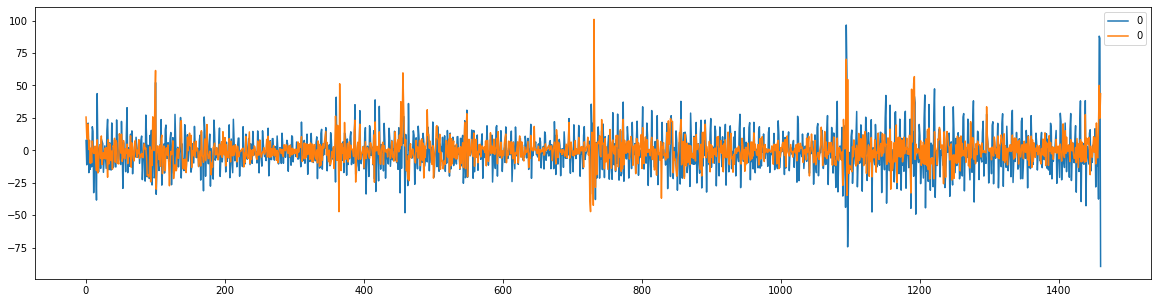

In [62]:
rfr.fit(X, y)
y_preds = rfr.predict(X)
y_resid = y.flatten() - y_preds

rfr_new.fit(X_new, y_new)
y_preds_new = rfr_new.predict(X_new)
y_resid_new = y_new.flatten() - y_preds_new

fig, axes = plt.subplots(1, 1, figsize=(20, 5))

pd.DataFrame(y_resid).plot(ax=axes, label='base')
pd.DataFrame(y_resid_new).plot(ax=axes, label='new')

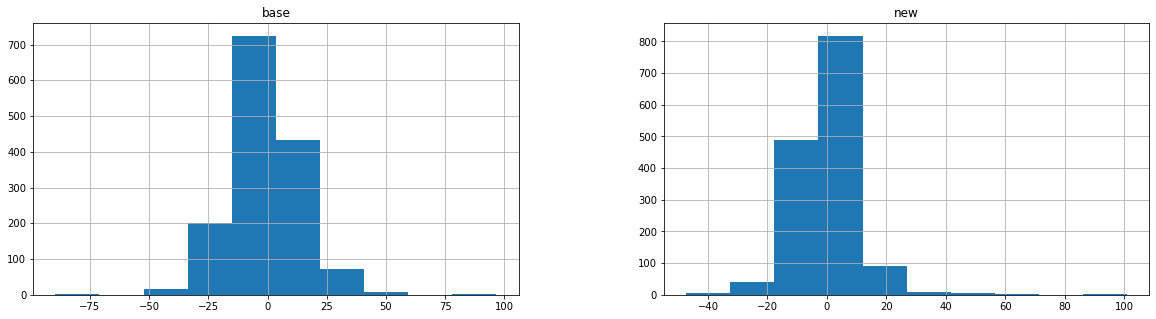

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

pd.DataFrame(y_resid).hist(ax=axes[0], label='base')
pd.DataFrame(y_resid_new).hist(ax=axes[1], label='new')
axes[0].title.set_text('base')
axes[1].title.set_text('new')

In [64]:
pd.DataFrame(y_resid).mean()

0   -0.735642
dtype: float64

In [65]:
pd.DataFrame(y_resid).skew()

0    0.292067
dtype: float64

In [66]:
pd.DataFrame(y_resid).std()

0    15.317305
dtype: float64

In [67]:
pd.DataFrame(y_resid_new).mean()

0    0.013621
dtype: float64

In [68]:
pd.DataFrame(y_resid_new).skew()

0    1.382297
dtype: float64

In [69]:
pd.DataFrame(y_resid_new).std()

0    10.634289
dtype: float64

## CREATE LAGGING FEATURES

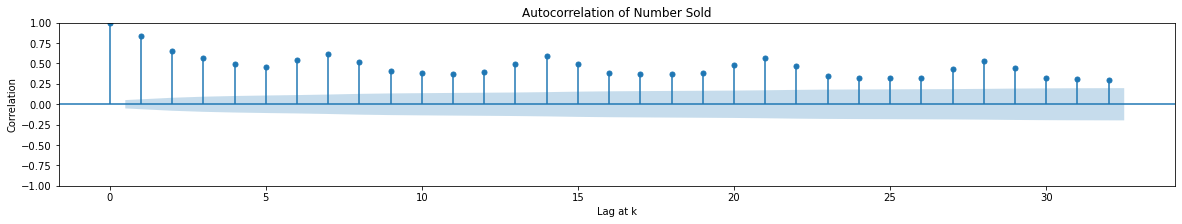

In [70]:
rcParams['figure.figsize'] = 20, 3

fig = tsaplots.plot_acf(train_pv[('Finland', 'KaggleMart', 'Kaggle Hat')])

plt.title('Autocorrelation of Number Sold')
plt.ylabel('Correlation')
plt.xlabel('Lag at k')
plt.show()

In [71]:
train_pv['lag_12'] = train_pv[('Finland', 'KaggleMart', 'Kaggle Hat')].shift(7, fill_value=0)
train_pv.head(20)

country       Finland                                                  \
store      KaggleMart                           KaggleRama              
product    Kaggle Hat Kaggle Mug Kaggle Sticker Kaggle Hat Kaggle Mug   
date                                                                    
2015-01-01        520        329            146        911        572   
2015-01-02        493        318            127        794        544   
2015-01-03        535        360            141        843        579   
2015-01-04        544        332            125        873        582   
2015-01-05        378        243            102        668        423   
2015-01-06        389        223             99        636        407   
2015-01-07        342        229             91        576        356   
2015-01-08        355        205             93        581        353   
2015-01-09        344        223            101        634        386   
2015-01-10        456        280            126        703        469   
2015-01-11        447        231            114        676        454   
2015-01-12        324        197             84        560        354   
2015-01-13        318        186             84        580        354   
2015-01-14        324        187             86        547        337   
2015-01-15        295        184             77        569        306   
2015-01-16        292        196             89        474        332   
2015-01-17        427        220            111        701        406   
2015-01-18        371        233            104        617        396   
2015-01-19        288        166             73        560        343   
2015-01-20        309        188             79        560        326   

country                       Norway                                       \
store                     KaggleMart                           KaggleRama   
product    Kaggle Sticker Kaggle Hat Kaggle Mug Kaggle Sticker Kaggle Hat   
date                                                                        
2015-01-01            283        906        526            250       1461   
2015-01-02            249        845        538            237       1446   
2015-01-03            265        930        614            254       1631   
2015-01-04            245        889        589            255       1540   
2015-01-05            187        671        435            184       1126   
2015-01-06            168        683        402            181       1131   
2015-01-07            173        504        371            149        958   
2015-01-08            163        574        361            163       1004   
2015-01-09            165        566        338            153       1053   
2015-01-10            198        512        433            172       1122   
2015-01-11            205        679        387            170       1109   
2015-01-12            151        510        323            147        885   
2015-01-13            149        522        311            140        939   
2015-01-14            142        495        325            144        946   
2015-01-15            149        505        316            135        972   
2015-01-16            151        514        347            171       1008   
2015-01-17            176        671        399            184       1109   
2015-01-18            163        626        411            161       1109   
2015-01-19            158        545        303            137        913   
2015-01-20            140        538        335            129        955   

country                                  Sweden                            \
store                                KaggleMart                             
product    Kaggle Mug Kaggle Sticker Kaggle Hat Kaggle Mug Kaggle Sticker   
date                                                                        
2015-01-01       1005            395        624        440            175   
2015-01-02   

In [72]:
rfr_new2 = RandomForestRegressor(n_estimators=1_000, random_state=42)

ts_cv = TimeSeriesSplit(n_splits=5)

X_new2 = train_pv[['Day of the Month', 'Day of the Week', 
                            'Month', 'Year', 'Day of the Year', 'Week of the Year', 
                            'Quater', 'Weekend', 'lag_12']].values
y_new2 = train_pv[('Finland', 'KaggleMart', 'Kaggle Hat')].values

scores = cross_validate(rfr_new2, X_new2, y_new2, cv=ts_cv, 
                        scoring='neg_mean_squared_log_error', 
                        return_estimator=True)

new_rmsle = np.sqrt(-np.mean(scores['test_score']))
print(f'New Root Mean Squared Log Error is: {new_rmsle:.5f}.')

New Root Mean Squared Log Error is: 0.12118.


In [76]:
train_pv['diff'] = train_pv[('Finland', 'KaggleMart', 'Kaggle Hat')].diff()
train_pv['diff'] = train_pv['diff'].fillna(0)

rfr_new3 = RandomForestRegressor(n_estimators=1_000, random_state=42)

ts_cv = TimeSeriesSplit(n_splits=5)

X_new3 = train_pv[['Day of the Month', 'Day of the Week', 
                    'Month', 'Year', 'Day of the Year', 'Week of the Year', 
                    'Quater', 'Weekend', 'lag_12', 'diff']].values
y_new3 = train_pv[('Finland', 'KaggleMart', 'Kaggle Hat')].values

scores = cross_validate(rfr_new3, X_new3, y_new3, cv=ts_cv, 
                        scoring='neg_mean_squared_log_error', 
                        return_estimator=True)

new_rmsle = np.sqrt(-np.mean(scores['test_score']))
print(f'New Root Mean Squared Log Error is: {new_rmsle:.5f}.')

New Root Mean Squared Log Error is: 0.11435.


## TPSJAN22-03 Linear Model
https://www.kaggle.com/code/ambrosm/tpsjan22-03-linear-model

## TPSJAN22-01 EDA which makes sense ⭐️⭐️⭐️⭐️⭐️
https://www.kaggle.com/code/ambrosm/tpsjan22-01-eda-which-makes-sense/notebook

In [77]:
train_df = pd.read_csv(TRAIN_PATH, parse_dates=['date'], index_col='date')
train_df

row_id  country       store         product  num_sold
date                                                             
2015-01-01       0  Finland  KaggleMart      Kaggle Mug       329
2015-01-01       1  Finland  KaggleMart      Kaggle Hat       520
2015-01-01       2  Finland  KaggleMart  Kaggle Sticker       146
2015-01-01       3  Finland  KaggleRama      Kaggle Mug       572
2015-01-01       4  Finland  KaggleRama      Kaggle Hat       911
...            ...      ...         ...             ...       ...
2018-12-31   26293   Sweden  KaggleMart      Kaggle Hat       823
2018-12-31   26294   Sweden  KaggleMart  Kaggle Sticker       250
2018-12-31   26295   Sweden  KaggleRama      Kaggle Mug      1004
2018-12-31   26296   Sweden  KaggleRama      Kaggle Hat      1441
2018-12-31   26297   Sweden  KaggleRama  Kaggle Sticker       388

[26298 rows x 5 columns]

In [78]:
test_df = pd.read_csv(TEST_PATH, parse_dates=['date'], index_col='date')
test_df

row_id  country       store         product
date                                                   
2019-01-01   26298  Finland  KaggleMart      Kaggle Mug
2019-01-01   26299  Finland  KaggleMart      Kaggle Hat
2019-01-01   26300  Finland  KaggleMart  Kaggle Sticker
2019-01-01   26301  Finland  KaggleRama      Kaggle Mug
2019-01-01   26302  Finland  KaggleRama      Kaggle Hat
...            ...      ...         ...             ...
2019-12-31   32863   Sweden  KaggleMart      Kaggle Hat
2019-12-31   32864   Sweden  KaggleMart  Kaggle Sticker
2019-12-31   32865   Sweden  KaggleRama      Kaggle Mug
2019-12-31   32866   Sweden  KaggleRama      Kaggle Hat
2019-12-31   32867   Sweden  KaggleRama  Kaggle Sticker

[6570 rows x 4 columns]

### Completeness of the Data

In [79]:
print(train_df.groupby(['country', 'store', 'product']).count())
print('First day:', train_df.index.min(), ' Last day:', train_df.index.max())
print('Number of days in four years:', 365 * 4 + 1)
print(18 * 1461, train_df.shape, train_df.index.isna().sum())

                                   row_id  num_sold
country store      product                         
Finland KaggleMart Kaggle Hat        1461      1461
                   Kaggle Mug        1461      1461
                   Kaggle Sticker    1461      1461
        KaggleRama Kaggle Hat        1461      1461
                   Kaggle Mug        1461      1461
                   Kaggle Sticker    1461      1461
Norway  KaggleMart Kaggle Hat        1461      1461
                   Kaggle Mug        1461      1461
                   Kaggle Sticker    1461      1461
        KaggleRama Kaggle Hat        1461      1461
                   Kaggle Mug        1461      1461
                   Kaggle Sticker    1461      1461
Sweden  KaggleMart Kaggle Hat        1461      1461
                   Kaggle Mug        1461      1461
                   Kaggle Sticker    1461      1461
        KaggleRama Kaggle Hat        1461      1461
                   Kaggle Mug        1461      1461
            

In [80]:
train_df.groupby(['country', 'store', 'product']).num_sold.agg(['min', 'max', 'mean'])

min   max         mean
country store      product                               
Finland KaggleMart Kaggle Hat      210  1113   362.479808
                   Kaggle Mug      126   774   204.200548
                   Kaggle Sticker   70   326   103.044490
        KaggleRama Kaggle Hat      354  1895   628.926762
                   Kaggle Mug      220  1398   356.110883
                   Kaggle Sticker  128   559   180.232033
Norway  KaggleMart Kaggle Hat      335  1809   594.645448
                   Kaggle Mug      201  1113   334.370294
                   Kaggle Sticker  114   518   169.577687
        KaggleRama Kaggle Hat      596  2884  1036.357974
                   Kaggle Mug      366  1935   584.297741
                   Kaggle Sticker  214   874   295.607803
Sweden  KaggleMart Kaggle Hat      248  1207   419.214237
                   Kaggle Mug      149   730   235.885010
                   Kaggle Sticker   86   356   119.613279
        KaggleRama Kaggle Hat      428  2169   731.452430
                   Kaggle Mug      253  1438   411.273101
                   Kaggle Sticker  148   637   208.314853

### KaggleRama Sells More

In [81]:
kk = train_df.groupby(['country', 'store', 'product']).num_sold.mean().unstack(level='store')
kk['KaggleRama:KaggleMart'] = kk.KaggleRama / kk.KaggleMart
kk

store                   KaggleMart   KaggleRama  KaggleRama:KaggleMart
country product                                                       
Finland Kaggle Hat      362.479808   628.926762               1.735067
        Kaggle Mug      204.200548   356.110883               1.743927
        Kaggle Sticker  103.044490   180.232033               1.749070
Norway  Kaggle Hat      594.645448  1036.357974               1.742817
        Kaggle Mug      334.370294   584.297741               1.747457
        Kaggle Sticker  169.577687   295.607803               1.743200
Sweden  Kaggle Hat      419.214237   731.452430               1.744818
        Kaggle Mug      235.885010   411.273101               1.743532
        Kaggle Sticker  119.613279   208.314853               1.741570

### Products

In [82]:
kk = train_df.groupby(['country', 'store', 'product', train_df.index.year]).num_sold.mean().unstack(level='product')
kk['Mugs:Sticker'] = kk['Kaggle Mug'] / kk['Kaggle Sticker']
kk['Hats:Sticker'] = kk['Kaggle Hat'] / kk['Kaggle Sticker']
kk

product                   Kaggle Hat  Kaggle Mug  Kaggle Sticker  \
country store      date                                            
Finland KaggleMart 2015   328.947945  185.657534       93.517808   
                   2016   342.773224  192.155738       97.174863   
                   2017   372.758904  210.479452      106.082192   
                   2018   405.493151  228.542466      115.419178   
        KaggleRama 2015   573.260274  322.868493      163.813699   
                   2016   596.931694  335.158470      169.871585   
                   2017   644.789041  367.315068      185.936986   
                   2018   700.813699  399.158904      201.334247   
Norway  KaggleMart 2015   570.076712  320.043836      161.936986   
                   2016   545.489071  306.849727      156.221311   
                   2017   601.043836  337.942466      171.227397   
                   2018   662.106849  372.720548      188.961644   
        KaggleRama 2015   991.465753  556.156164      281.635616   
                   2016   952.767760  538.267760      272.286885   
                   2017  1046.578082  592.904110      299.679452   
                   2018  1154.849315  649.989041      328.893151   
Sweden  KaggleMart 2015   396.342466  222.854795      112.863014   
                   2016   407.322404  227.469945      115.609290   
                   2017   432.728767  244.750685      123.254795   
                   2018   440.495890  248.487671      126.736986   
        KaggleRama 2015   691.939726  388.676712      196.821918   
                   2016   709.106557  399.095628      201.983607   
                   2017   752.857534  423.035616      214.846575   
                   2018   771.967123  434.317808      219.624658   

product                  Mugs:Sticker  Hats:Sticker  
country store      date                              
Finland KaggleMart 2015      1.985264      3.517490  
                   2016      1.977422      3.527386  
                   2017      1.984117      3.513869  
                   2018      1.980108      3.513222  
        KaggleRama 2015      1.970949      3.499465  
                   2016      1.973011      3.514017  
                   2017      1.975481      3.467783  
                   2018      1.982568      3.480847  
Norway  KaggleMart 2015      1.976348      3.520361  
                   2016      1.964199      3.491771  
                   2017      1.973647      3.510208  
                   2018      1.972467      3.503922  
        KaggleRama 2015      1.974737      3.520385  
                   2016      1.976841      3.499132  
                   2017      1.978461      3.492325  
                   2018      1.976292      3.511321  
Sweden  KaggleMart 2015      1.974560      3.511713  
                   2016      1.967575      3.523267  
                   2017      1.985730      3.510847  
                   2018      1.960656      3.475670  
        KaggleRama 2015      1.974763      3.515562  
                   2016      1.975881      3.510713  
                   2017      1.969013      3.504164  
                   2018      1.977546      3.514938

In [83]:
kk = train_df.groupby(['product', train_df.index.month]).num_sold.mean().unstack(level='product')
kk['Mugs:Sticker'] = kk['Kaggle Mug'] / kk['Kaggle Sticker']
kk['Hats:Sticker'] = kk['Kaggle Hat'] / kk['Kaggle Sticker']
kk

product  Kaggle Hat  Kaggle Mug  Kaggle Sticker  Mugs:Sticker  Hats:Sticker
date                                                                       
1        688.612903  419.631720      187.096774      2.242859      3.680517
2        686.278761  372.073746      169.793510      2.191331      4.041843
3        729.115591  353.951613      172.145161      2.056123      4.235470
4        784.891667  352.075000      184.615278      1.907074      4.251499
5        752.611559  329.176075      186.262097      1.767274      4.040605
6        662.947222  301.909722      178.951389      1.687105      3.704622
7        573.794355  290.754032      172.998656      1.680672      3.316756
8        509.762097  303.047043      171.380376      1.768272      2.974448
9        476.206944  326.465278      172.684722      1.890528      2.757667
10       474.994624  352.370968      172.194892      2.046350      2.758471
11       516.137500  380.491667      174.848611      2.176121      2.951911
12       693.469086  470.077957      208.747312      2.251899      3.322050

### Histograms and SMAPE

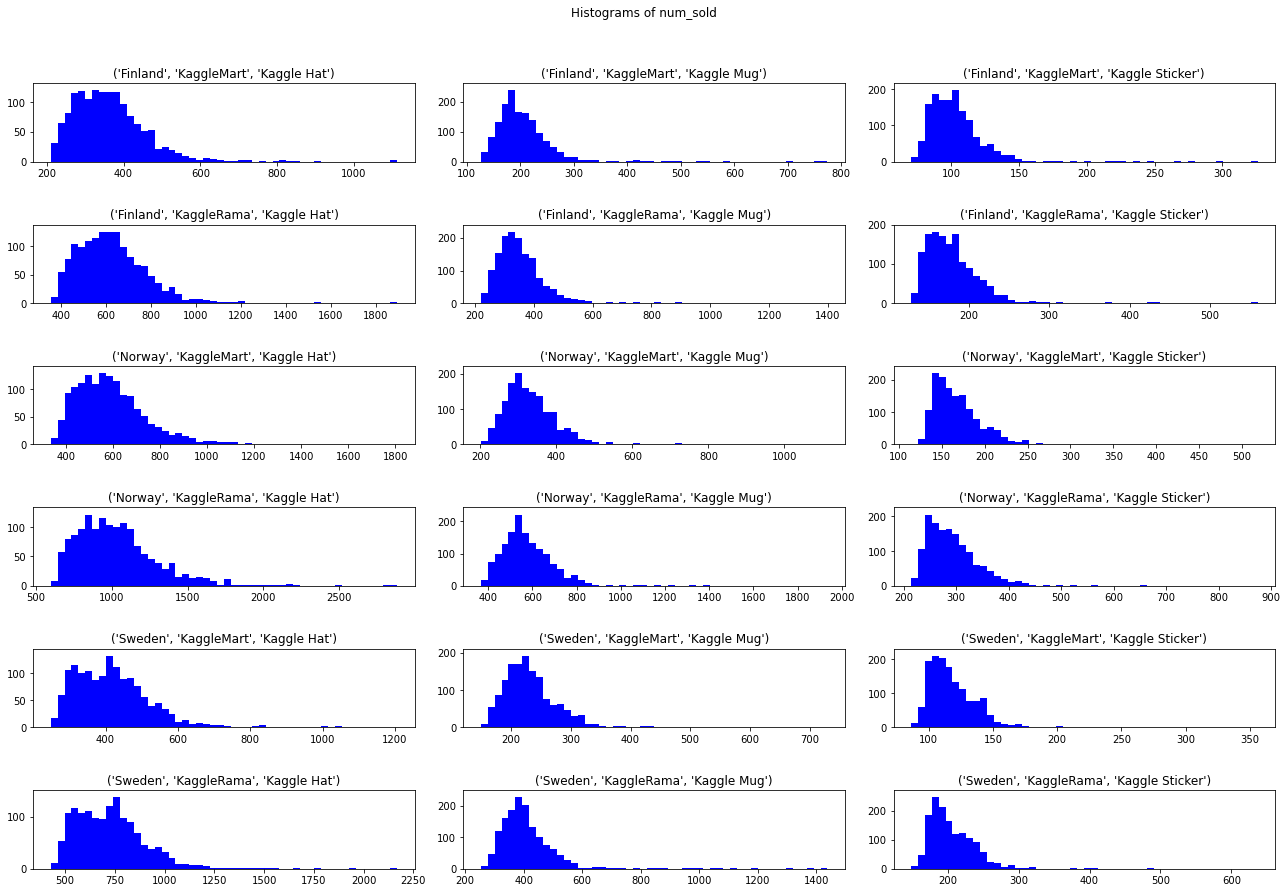

In [84]:
plt.figure(figsize=(18, 12))

for i, (combi, df) in enumerate(train_df.groupby(['country', 'store', 'product'])):
    ax = plt.subplot(6, 3, i+1, ymargin=0.1)
    ax.hist(df.num_sold, bins=50, color='blue')
    ax.set_title(combi)

plt.suptitle('Histograms of num_sold', y=1.03)
plt.tight_layout(h_pad=3.0)
plt.show()

### Time Series

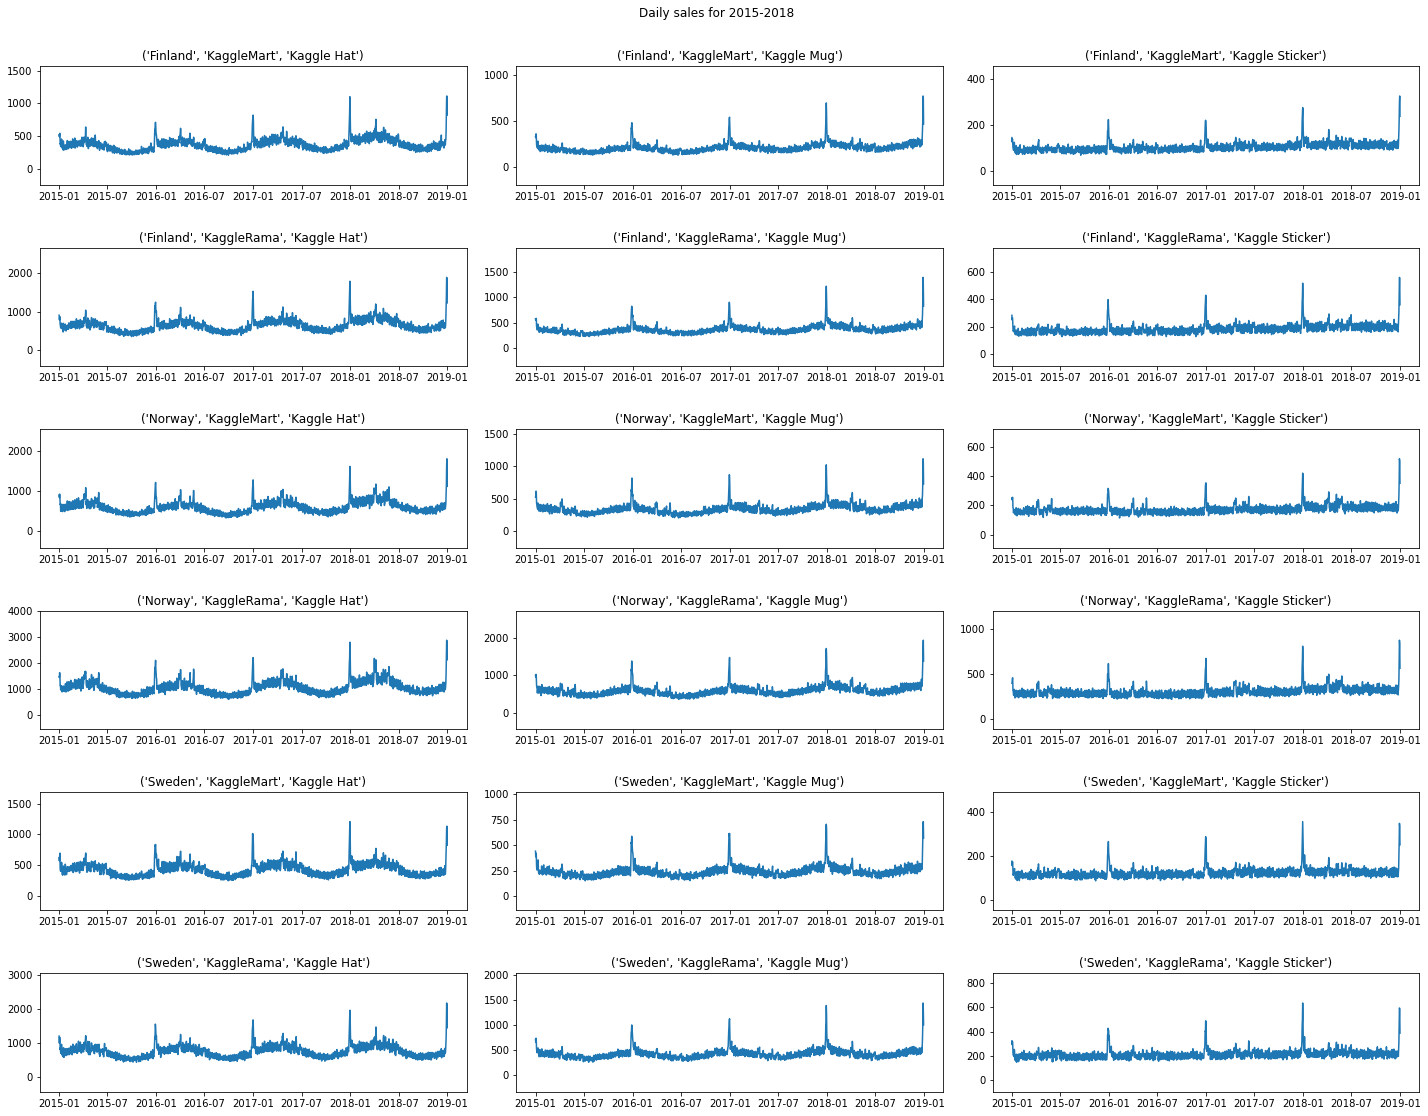

In [87]:
plt.figure(figsize=(20, 15))

for i, (combi, df) in enumerate(train_df.groupby(['country', 'store', 'product'])):
    ax = plt.subplot(6, 3, i+1, ymargin=0.5)
    ax.plot(df.num_sold)
    ax.set_title(combi)

plt.tight_layout(h_pad=3.0)
plt.suptitle('Daily sales for 2015-2018', y=1.03)
plt.show()

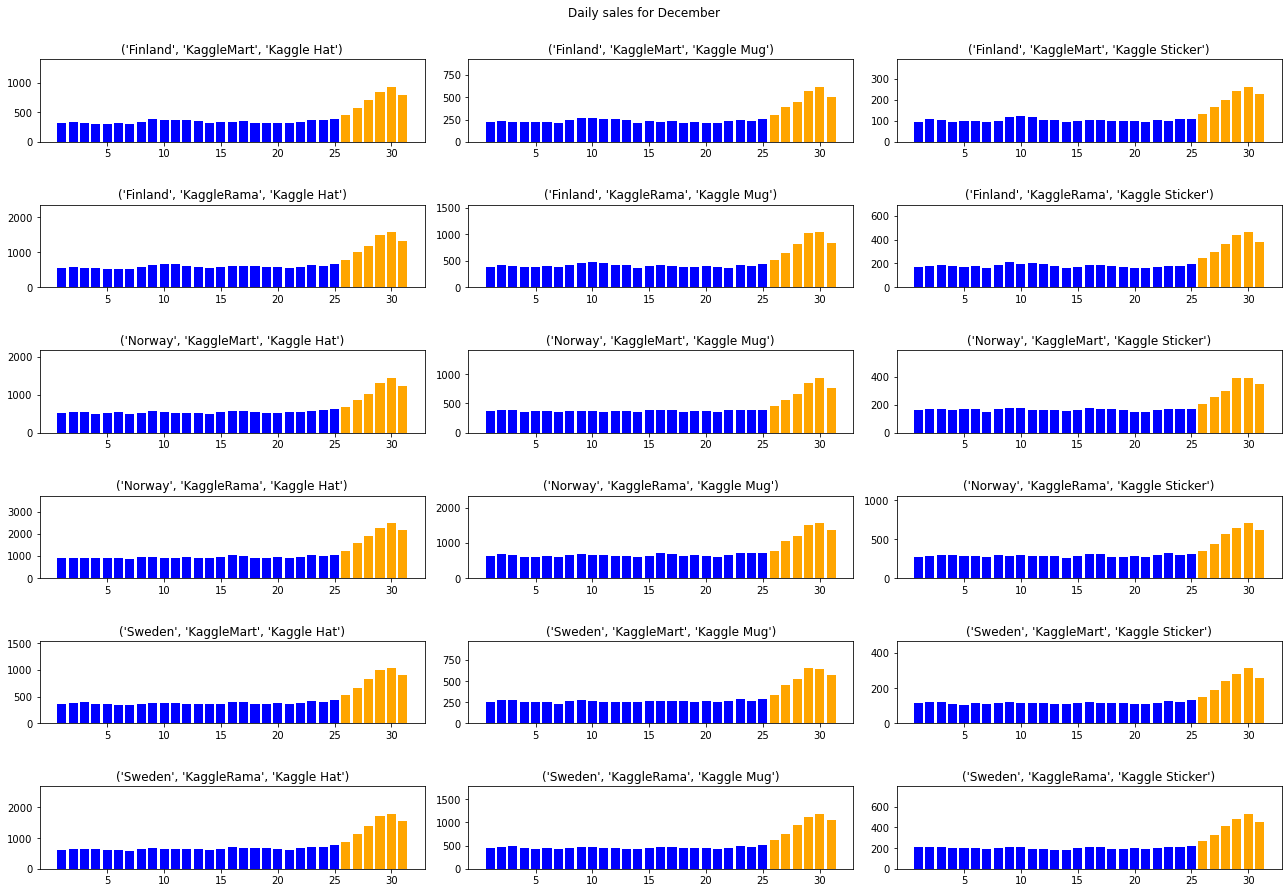

In [107]:
plt.figure(figsize=(18, 12))

for i, (combi, df) in enumerate(train_df.groupby(['country', 'store', 'product'])):
    ax = plt.subplot(6, 3, i+1, ymargin=0.5)
    df['day'] = df.index.day
    ax.bar(range(1, 32), 
           df[df.index.month==12].groupby(['day']).num_sold.mean(), 
           color=['blue']*25+['orange']*6)
    ax.set_title(combi)
    ax.set_xticks(ticks=range(5, 31, 5))
plt.tight_layout(h_pad=3.0)
plt.suptitle('Daily sales for December', y=1.03)
plt.show()

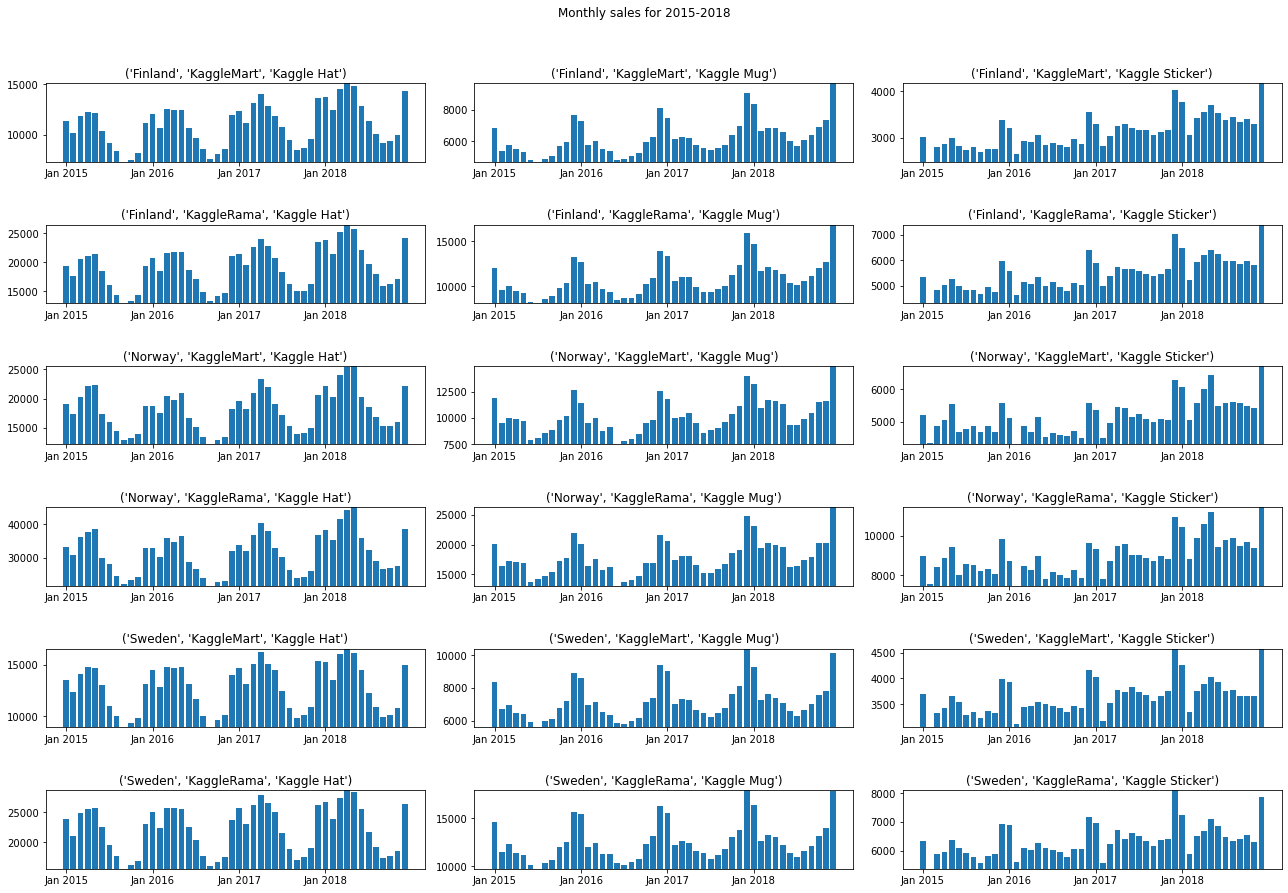

In [108]:
plt.figure(figsize=(18, 12))

for i, (combi, df) in enumerate(train_df.groupby(['country', 'store', 'product'])):
    ax = plt.subplot(6, 3, i+1, ymargin=0.5)
    resampled = df.resample('MS').num_sold.sum()
    ax.bar(range(len(resampled)), resampled)
    ax.set_title(combi)
    ax.set_ylim(resampled.min(), resampled.max())
    ax.set_xticks(range(0, 48, 12), [f'Jan {y}' for y in range(2015, 2019)])

plt.suptitle('Monthly sales for 2015-2018', y=1.03)
plt.tight_layout(h_pad=3.0)
plt.show()

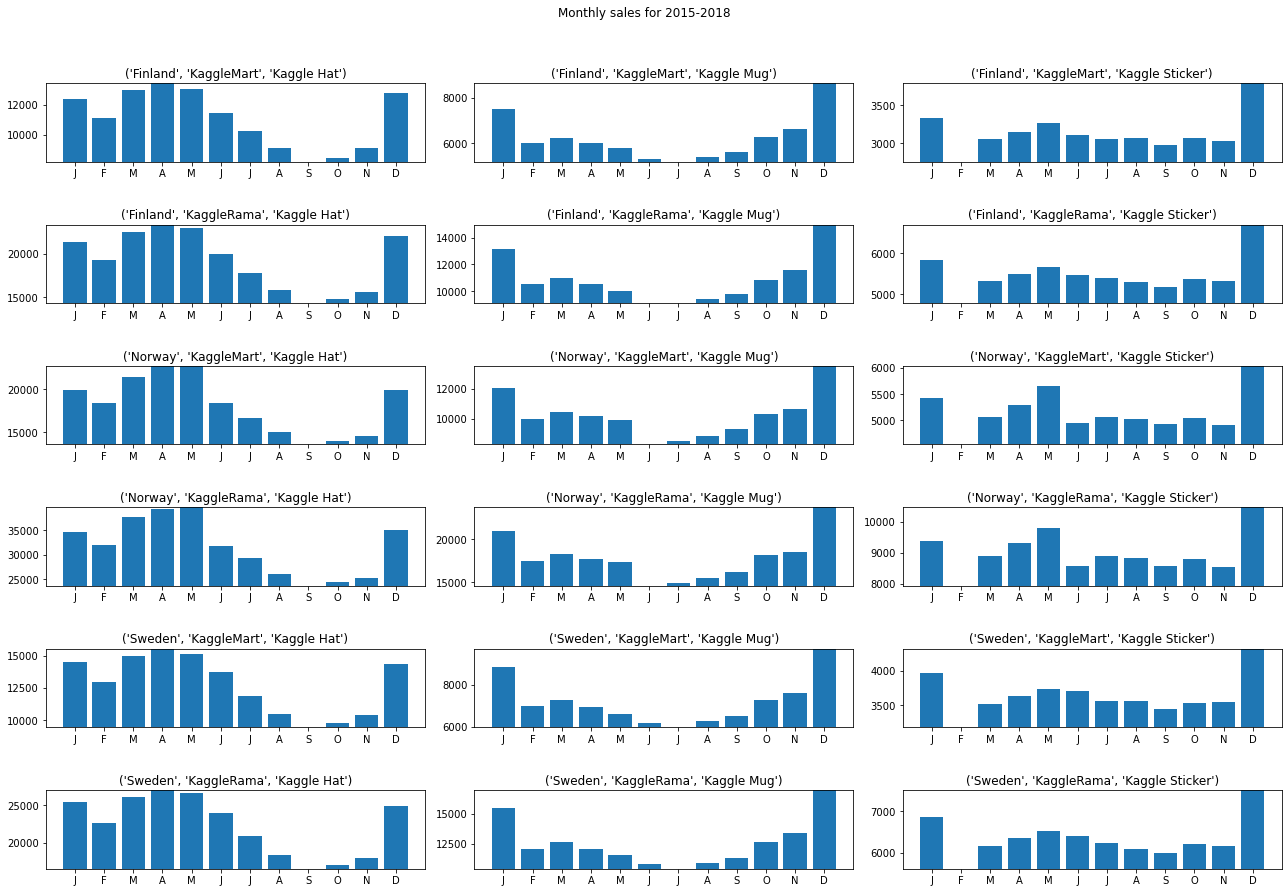

In [110]:
plt.figure(figsize=(18, 12))

for i, (combi, df) in enumerate(train_df.groupby(['country', 'store', 'product'])):
    ax = plt.subplot(6, 3, i+1, ymargin=0.5)
    resampled = df.resample('MS').sum()
    resampled = resampled.groupby(resampled.index.month).mean()
    ax.bar(range(1, 13), resampled.num_sold)
    ax.set_xticks(ticks=range(1, 13), labels='JFMAMJJASOND')
    ax.set_title(combi)
    ax.set_ylim(resampled.num_sold.min(), resampled.num_sold.max())

plt.suptitle('Monthly sales for 2015-2018', y=1.03)
plt.tight_layout(h_pad=3.0)
plt.show()

### Growth

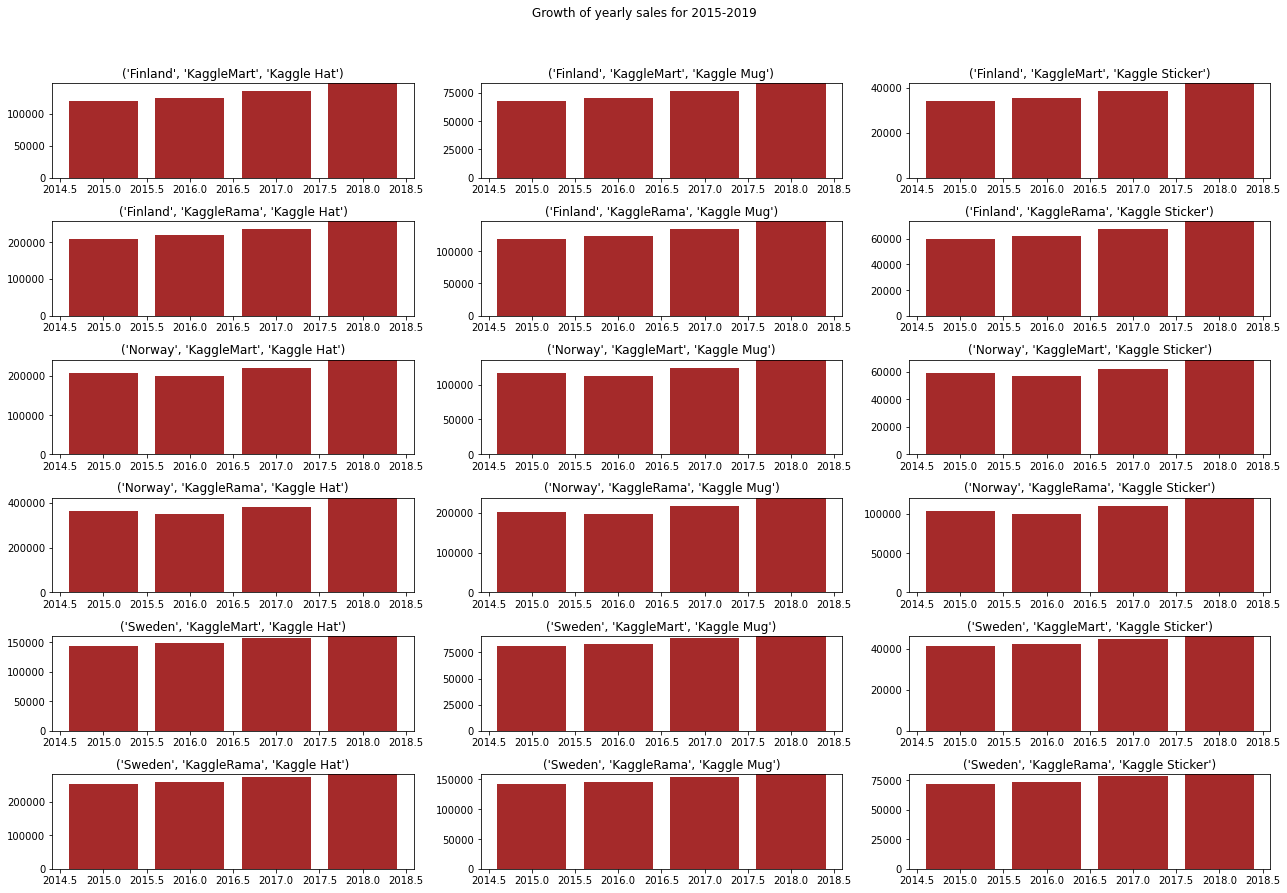

In [113]:
plt.figure(figsize=(18, 12))

for i, (combi, df) in enumerate(train_df.groupby(['country', 'store', 'product'])):
    ax = plt.subplot(6, 3, i+1, ymargin=0.5)
    resampled = df.resample('AS').sum()
    ax.bar(range(2015, 2019), resampled.num_sold, color='brown')
    ax.set_title(combi)
    ax.set_ylim(0, resampled.num_sold.max())
plt.suptitle('Growth of yearly sales for 2015-2019', y=1.03)
plt.tight_layout()
plt.show()

### Weekdays

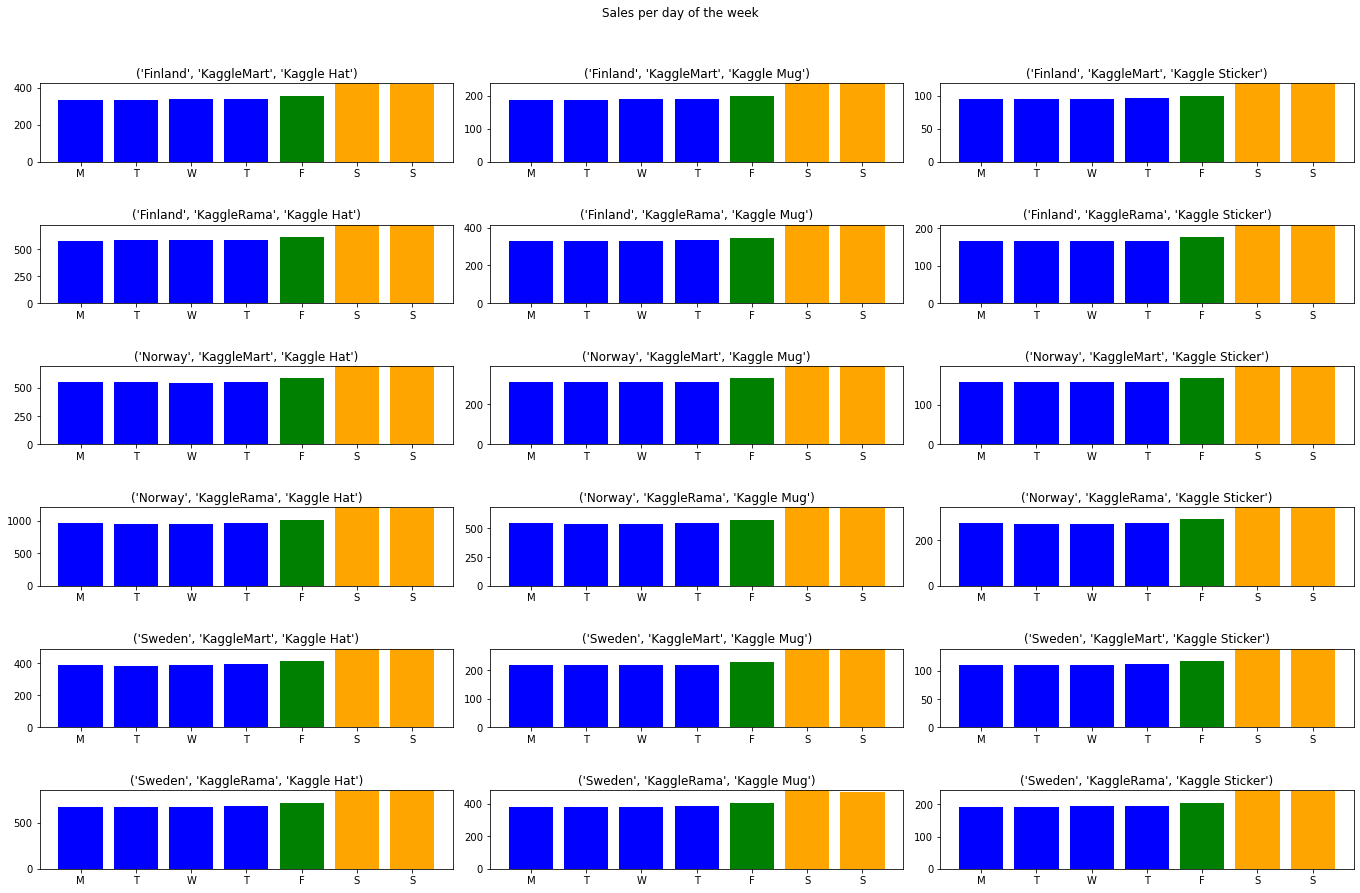

In [114]:
plt.figure(figsize=(19, 12))
for i, (combi, df) in enumerate(train_df.groupby(['country', 'store', 'product'])):
    ax = plt.subplot(6, 3, i+1, ymargin=0.5)
    resampled = df.groupby(df.index.dayofweek).mean()
    ax.bar(range(7), resampled.num_sold, 
           color=['b']*4 + ['g'] + ['orange']*2)
    ax.set_title(combi)
    ax.set_xticks(ticks=range(7), labels=['M', 'T', 'W', 'T', 'F', 'S', 'S'])
    ax.set_ylim(0, resampled.num_sold.max())
plt.suptitle('Sales per day of the week', y=1.03)
plt.tight_layout(h_pad=3.0)
plt.show()

### Easter

In [115]:
import dateutil.easter as easter

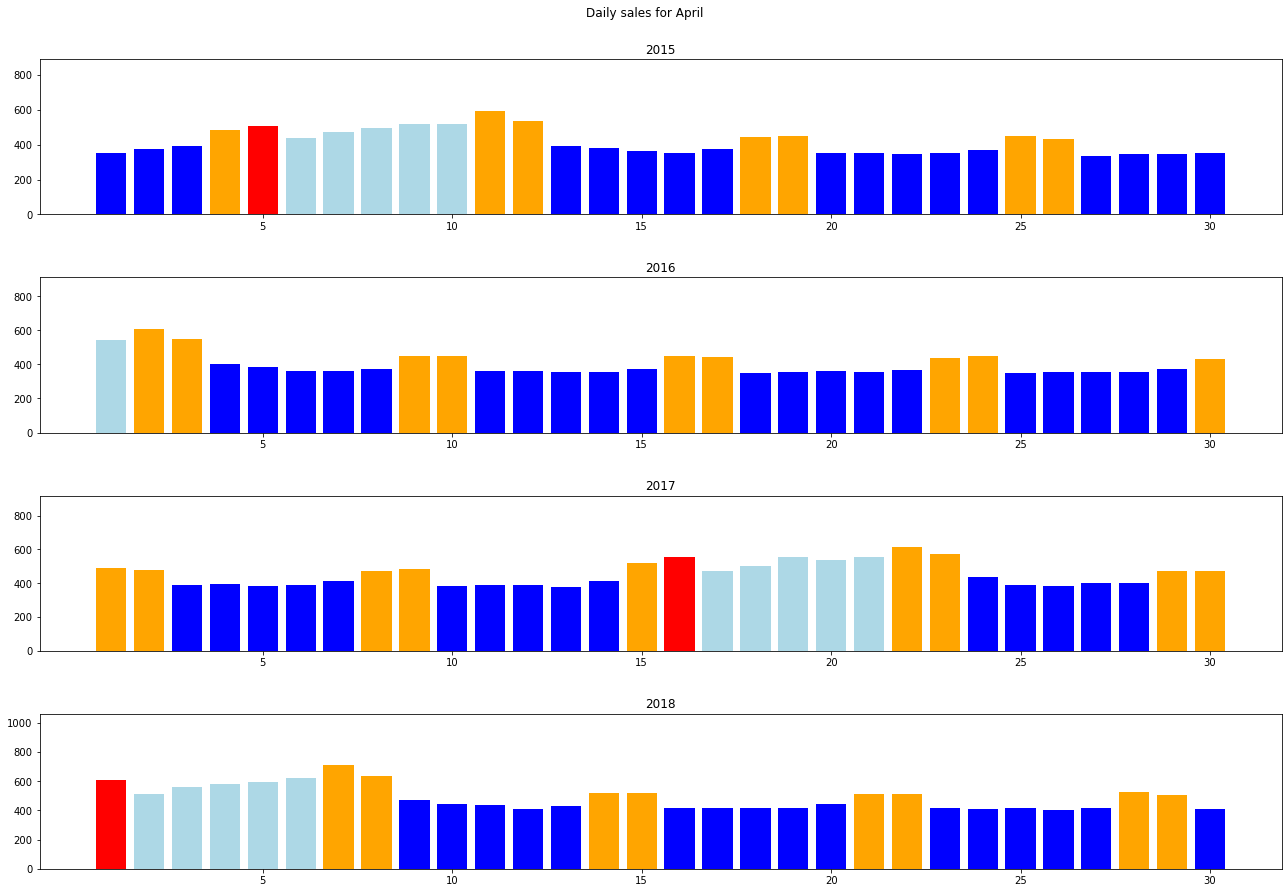

In [133]:
plt.figure(figsize=(18, 12))
for i, (year, df) in enumerate(train_df.groupby(train_df.index.year)):
    df['day'] = df.index.day
    #print(df[(df.index.month==4)].groupby('day').mean()['num_sold'])
    #print(df[(df.index.month==4)].groupby('day'))
    ax = plt.subplot(4, 1, i+1, ymargin=0.5)
    april = df[(df.index.month==4)].groupby('day').mean()['num_sold']
    date_range = pd.date_range(start=f'{year}-04-01', end=f'{year}-04-30', freq='D')
    easter_date = easter.easter(year)
    color = ['r' if d == pd.Timestamp(easter_date) 
             else 'lightblue'
             if (d.date() - easter_date).days in range(6) 
             else 'b'
             if d.dayofweek < 5
             else 'orange' for d in date_range]
    ax.bar(range(1, 31), april, color=color)
    ax.set_title(str(year))
    ax.set_xticks(ticks=range(5, 31, 5))
plt.tight_layout(h_pad=3.0)
plt.suptitle('Daily sales for April', y=1.03)
plt.show()